In [1]:
# ייבוא ספריות והגדרות מסודרות לעבודה שלי של חן ורעות
# לא לגעת בזה 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt



"""
 כללי עבודה:
1. כל פקודה תעובד בנפרד בשלב הראשון, כך נוכל לבדוק אם יש שגיאות בודדות ולטפל בהן.
2. בסוף, אחרי שכל הפקודות נבדקו והן פועלות בצורה תקינה, נריץ את כל הפקודות יחד.
# זה חשוב לוודא שהקוד עובד כמו שצריך ולמנוע בעיות לא צפויות בריצה הגדולה
"""

"""
מה הספקנו עד עכשיו:
1. הגדרת נתיב לשאיבת הנתונים של הקובץ המקורי
2. ניקוי כל השורות האחרונות והמיותרות
3. בדיקה של ערכים חסרים בכל עמודה
"""

"""
תכונות מעניינות שלמדנו:
1. במידה ושמים נקודה פסיק  בסוף פקודה היא לא תרוץ
2. קיצור להרצת הקוד - שיפט ואנטר ביחד
3. קיצור לצפייה בהוראות הפקודה - שיפט וטאב ביחד
"""



ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# ייבוא נתונים מהקובת המקורי - רן

# קביעת הנתיב של תיקיית העבודה הנוכחית
project_root = os.getcwd()
# הגדרת הנתיב היחסי לקובץ Excel בתיקיית Original_Source
input_file = os.path.join(project_root, "Original_Source", "DEIDאשפוזים פרטים דומגרפיים.xlsx")

# טעינת הקובץ לפנדס
df = pd.read_excel(input_file)

# הצגת חמש השורות הראשונות של הנתונים
print(df.head())


In [4]:
# ניקוי שורות לא רלוונטיות
# חן רעות אל תגעו זה תוקן בוודאות 100 אחוז חתום נעולללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללללל
# הגדרת הנתיב לתיקיית Excel_Updates\Update 1 - Deleting Empty Rows at the End
output_dir = os.path.join(project_root, "Excel_Updates", "Update 1 - Deleting Empty Rows at the End")

# הגדרת הנתיב המלא לשם הקובץ
output_file = os.path.join(output_dir, "cleaned_hospital_data_up_to_17567_Test.xlsx")

# ניקוי שורות לא רלוונטיות - כל השורות עד 17566 כולל
df_cleaned = df.iloc[:17567]  # כל השורות עד השורה ה-17,567 (כולל)

# שמירת הקובץ
df_cleaned.to_excel(output_file, index=False)

print(f"קובץ חדש נשמר בנתיב: {output_file}")
print(f"סה\"כ נשמרו {len(df_cleaned)} שורות.")


קובץ חדש נשמר בנתיב: C:\Users\User\Desktop\DataFinalProjectDegree\final_project\Excel_Updates\Update 1 - Deleting Empty Rows at the End\cleaned_hospital_data_up_to_17567_Test.xlsx
סה"כ נשמרו 17567 שורות.


In [5]:
#רעות 12/12- בדיקה לשורות כפולות ומחיקתן 

# הגדרת הנתיב היחסי לתיקיית Excel_Updates\Update 1 - Deleting Empty Rows at the End
input_file = os.path.join(project_root, "Excel_Updates", "Update 1 - Deleting Empty Rows at the End", "cleaned_hospital_data_up_to_17567_Test.xlsx")
output_file = os.path.join(project_root, "Excel_Updates", "Update 2 - Removing Duplicate Rows and Saving Duplicates to a Separate File", "cleaned_hospital_data_no_duplicates.xlsx")
removed_rows_file = os.path.join(project_root, "Excel_Updates", "Update 2 - Removing Duplicate Rows and Saving Duplicates to a Separate File", "removed_duplicate_rows.xlsx")

# קריאת הקובץ שנוצר לאחר מחיקת השורות הלא רלוונטיות
df = pd.read_excel(input_file)

# ניקוי רווחים מיותרים מכל התאים
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# יצירת DataFrame לאיתור כפילויות
duplicates = df[df.duplicated(keep='first')]  # שמירה רק על השורות הכפולות, לא הראשונה

# הצגת הכפילויות
print("שורות כפולות שנמצאו:")
print(duplicates)

# איתור ההתאמה בין השורות הכפולות לשורות הראשונות הזהות להן
mapping = {}
for index, row in duplicates.iterrows():
    for original_index, original_row in df[df.index < index].iterrows():
        if row.equals(original_row):
            mapping[index] = original_index
            break

# תיעוד מספרי השורות שהוסרו ומדוע
if mapping:
    print("שורות שנמחקו וההתאמה שלהן לשורות קיימות:")
    for removed_index, matched_index in mapping.items():
        print(f"שורה {removed_index} נמחקה כי היא זהה לשורה {matched_index}")
else:
    print("לא נמצאו שורות כפולות למחיקה.")

# מחיקת השורות הכפולות
df_cleaned = df.drop_duplicates()

# שמירת הקובץ הנקי לאחר מחיקת הכפולות
df_cleaned.to_excel(output_file, index=False)

# שמירת שורות שהוסרו (כפולות) לקובץ נפרד
duplicates.to_excel(removed_rows_file, index=False)

print(f"הקובץ הנקי (ללא כפילויות) נשמר ב-{output_file}.")
print(f"שורות שהוסרו נשמרו ב-{removed_rows_file}.")
print(f"סה\"כ {len(duplicates)} שורות נמחקו.")






C:\Users\User\AppData\Local\Temp\ipykernel_7004\3333434436.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


שורות כפולות שנמצאו:
Empty DataFrame
Columns: [מספר מטופל רנדומלי, מספר מקרה אשפוז רנדומלי, תאריך פטירה, ארץ לידה, מגדר, תאריך לידה, תאריך עליה, מצב משפחתי, מספר ילדים, גורם מפנה, סיבת קבלה, תאריך ושעת כניסה למחלקה, תאריך ושעת יציאה מהמחלקה, יחידה רפואית - אשפוז, ימי אשפוז ברוטו, סטטוס חוקי - אשפוז, סיבת שחרור, הופנה ל]
Index: []
לא נמצאו שורות כפולות למחיקה.


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\User\\Desktop\\DataFinalProjectDegree\\final_project\\Excel_Updates\\Update 2 - Removing Duplicate Rows and Saving Duplicates to a Separate File\\cleaned_hospital_data_no_duplicates.xlsx'

In [ ]:
#בדיקה לשכפול מטופלים שהימי אשפוז/סטטוס אשפוז שונים - רעות 12/12

# יצירת נתיב לקובץ הקלט (cleaned_hospital_data_no_duplicates.xlsx)
input_file = os.path.join(project_root, "Excel_Updates", "Update 2 - Removing Duplicate Rows and Saving Duplicates to a Separate File", "cleaned_hospital_data_no_duplicates.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)

# העמודות להשוואה
columns_to_compare = [
    'מספר מטופל רנדומלי',
    'מספר מקרה אשפוז רנדומלי',
    'תאריך ושעת כניסה למחלקה',
    'תאריך ושעת יציאה מהמחלקה'
]

# בדיקה אם העמודות קיימות בקובץ
missing_columns = [col for col in columns_to_compare if col not in df.columns]
if missing_columns:
    print(f"עמודות חסרות בקובץ: {missing_columns}")
else:
    print("כל העמודות להשוואה קיימות בקובץ.")

# בדיקת ערכים זהים עבור העמודות שנבחרו
df_duplicates = df[df.duplicated(subset=columns_to_compare, keep=False)]

if not df_duplicates.empty:
    print(f"נמצאו {len(df_duplicates)} שורות שבהן הערכים זהים בעמודות: {columns_to_compare}")
    
    # יצירת נתיב לקובץ שבו יישמרו השורות הכפולות
    duplicates_file = os.path.join(project_root, "Excel_Updates", "Update 3 - Checking Patients with Different Hospitalization Days or Status", "duplicate_rows.xlsx")
    
    # שמירת השורות הכפולות בקובץ
    df_duplicates.to_excel(duplicates_file, index=False)
    print(f"שורות כפולות נשמרו בקובץ: {duplicates_file}")
    
    # הצגת המספרים הרנדומליים של המטופלים שנמצאו
    unique_patients = df_duplicates['מספר מטופל רנדומלי'].unique()
    print("מספרי המטופלים הרנדומליים שנמצאו:")
    for patient_id in unique_patients:
        print(patient_id)
else:
    print("לא נמצאו שורות שבהן הערכים זהים בכל העמודות שנבדקו.")

# זיהוי עמודות אחרות בקובץ שאינן נכללות בבדיקה
additional_columns = [col for col in df.columns if col not in columns_to_compare]
print(f"עמודות אחרות בקובץ שאינן נבדקות: {additional_columns}")


In [ ]:
##ר- המרת 'מגדר' לדומנים ודריסת הערך הראשון

# הגדרת הנתיב של הקובץ
input_file = os.path.join(project_root, "Excel_Updates", "Update 2 - Removing Duplicate Rows and Saving Duplicates to a Separate File", "cleaned_hospital_data_no_duplicates.xlsx")
print(f"קריאת הקובץ מ: {input_file}")

# קריאת הקובץ
df = pd.read_excel(input_file)

# בדיקה אם עמודת 'מגדר' קיימת
if 'מגדר' in df.columns:
    # המרת 'מגדר' לדומנים ודריסת הערך הראשון
    df_gender_dummies = pd.get_dummies(df['מגדר'], drop_first=True).astype(int)

    # קבלת שם העמודה החדשה (לדוגמה: 'נקבה')
    new_column_name = df_gender_dummies.columns[0]

    # מציאת אינדקס העמודה 'מגדר'
    gender_index = df.columns.get_loc('מגדר')

    # הסרת עמודת 'מגדר' והכנסת העמודה החדשה באותו מיקום
    df = df.drop(columns=['מגדר'])
    df.insert(gender_index, new_column_name, df_gender_dummies[new_column_name])

    print("עמודת 'מגדר' הוחלפה בעמודת הדומיין החדשה בהצלחה.")

    # שמירת הקובץ המעודכן
    output_file = os.path.join(project_root, "Excel_Updates", "Update 4 - Dummies for Gender", "cleaned_hospital_data_updated.xlsx")
    df.to_excel(output_file, index=False)
    print(f"הקובץ המעודכן נשמר בנתיב: {output_file}")
else:
    print("עמודת 'מגדר' לא נמצאה בקובץ.")


In [23]:
#הוספת עמודה של גיל המטופל ברגע האשפוז - רעות 12/12 
import pandas as pd

# נתיב הקובץ
input_file = os.path.join(project_root, "Excel_Updates", "Update 4 - Dummies for Gender", "cleaned_hospital_data_updated.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)

# בדיקה אם העמודות קיימות
required_columns = ['תאריך ושעת כניסה למחלקה', 'תאריך לידה']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"עמודות חסרות בקובץ: {missing_columns}")
else:
    # המרת העמודות לפורמט תאריך
    df['תאריך ושעת כניסה למחלקה'] = pd.to_datetime(df['תאריך ושעת כניסה למחלקה'], errors='coerce')
    df['תאריך לידה'] = pd.to_datetime(df['תאריך לידה'], errors='coerce')

    # חישוב גיל אשפוז
    df['גיל אשפוז'] = (df['תאריך ושעת כניסה למחלקה'] - df['תאריך לידה']).dt.days // 365

    # שמירת הקובץ המעודכן
    output_file = os.path.join(project_root, "Excel_Updates", "Update 5 - Correcting Patient Age Column", "cleaned_hospital_data_with_age.xlsx") 
    df.to_excel(output_file, index=False)
    print("עמודת 'גיל אשפוז' נוספה בהצלחה.")
    print(f"הקובץ המעודכן נשמר בנתיב: {output_file}")


עמודת 'גיל אשפוז' נוספה בהצלחה.
הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 5 - Correcting Patient Age Column\cleaned_hospital_data_with_age.xlsx


In [24]:

# חן- בדיקה שהתאריכים נכונים
# נתיב הקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates", "Update 5 - Correcting Patient Age Column", "cleaned_hospital_data_with_age.xlsx") 

# קריאת הקובץ
df = pd.read_excel(input_file)

# המרת העמודות לפורמט תאריך ושעה
df['תאריך ושעת יציאה מהמחלקה'] = pd.to_datetime(df['תאריך ושעת יציאה מהמחלקה'], errors='coerce')
df['תאריך ושעת כניסה למחלקה'] = pd.to_datetime(df['תאריך ושעת כניסה למחלקה'], errors='coerce')
df['תאריך לידה'] = pd.to_datetime(df['תאריך לידה'], errors='coerce')

# זיהוי שורות עם שגיאה בתאריכי יציאה וכניסה
invalid_exit_rows = df[df['תאריך ושעת יציאה מהמחלקה'] <= df['תאריך ושעת כניסה למחלקה']]
#מחיקת השורות האלו-לאחר וידוא עם אסתר מדובר במטופלים שלא נשארו לאשפוז

# זיהוי שורות עם שגיאה בתאריך לידה מול תאריך ושעת כניסה למחלקה
invalid_birth_to_entry_rows = df[df['תאריך לידה'] > df['תאריך ושעת כניסה למחלקה']]

# זיהוי שורות עם שגיאה בתאריך לידה מול תאריך ושעת יציאה מהמחלקה
invalid_birth_to_exit_rows = df[df['תאריך לידה'] > df['תאריך ושעת יציאה מהמחלקה']]

# הדפסת סיכום
print(f"נמצאו {len(invalid_exit_rows)} שורות עם שגיאה בתאריכי יציאה וכניסה.")
print(f"נמצאו {len(invalid_birth_to_entry_rows)} שורות שבהן תאריך לידה מאוחר מתאריך כניסה למחלקה.")
print(f"נמצאו {len(invalid_birth_to_exit_rows)} שורות שבהן תאריך לידה מאוחר מתאריך יציאה מהמחלקה.")

# שמירת השורות הלא תקינות לקבצי Excel לבדיקה
if not invalid_exit_rows.empty:

    invalid_exit_rows_file = os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "invalid_exit_rows.xlsx") 
    invalid_exit_rows.to_excel(invalid_exit_rows_file, index=False)
    print(f"שורות עם שגיאה בתאריכי יציאה וכניסה נשמרו ב-{invalid_exit_rows_file}.")

if not invalid_birth_to_entry_rows.empty:
    invalid_birth_to_entry_rows_file =  os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "invalid_birth_to_entry_rows.xlsx") 
    invalid_birth_to_entry_rows.to_excel(invalid_birth_to_entry_rows_file, index=False)
    print(f"שורות עם תאריך לידה מאוחר מתאריך כניסה נשמרו ב-{invalid_birth_to_entry_rows_file}.")

if not invalid_birth_to_exit_rows.empty:
    invalid_birth_to_exit_rows_file = os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "invalid_birth_to_exit_rows.xlsx") 
    invalid_birth_to_exit_rows.to_excel(invalid_birth_to_exit_rows_file, index=False)
    print(f"שורות עם תאריך לידה מאוחר מתאריך יציאה נשמרו ב-{invalid_birth_to_exit_rows_file}.")

# יצירת DataFrame חדש ללא השורות הלא תקינות
valid_rows = df[
    ~df.index.isin(invalid_exit_rows.index) &
    ~df.index.isin(invalid_birth_to_entry_rows.index) &
    ~df.index.isin(invalid_birth_to_exit_rows.index)
]

# שמירת הקובץ החדש עם הנתונים התקינים
output_file = os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "cleaned_hospital_data_valid.xlsx") 
valid_rows.to_excel(output_file, index=False)

print(f"הקובץ המעודכן נשמר בנתיב: {output_file}")


נמצאו 102 שורות עם שגיאה בתאריכי יציאה וכניסה.
נמצאו 0 שורות שבהן תאריך לידה מאוחר מתאריך כניסה למחלקה.
נמצאו 0 שורות שבהן תאריך לידה מאוחר מתאריך יציאה מהמחלקה.
שורות עם שגיאה בתאריכי יציאה וכניסה נשמרו ב-C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 6 - Checking Date Columns\invalid_exit_rows.xlsx.
הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 6 - Checking Date Columns\cleaned_hospital_data_valid.xlsx


In [26]:
# .חן - המרת תאריכים בפורמט נכון (תאריך שחרור מהמחלקה לא נכון אומר על מתאשפזים נוכחיים)

# נתיב הקובץ המקורי
input_file =  os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "cleaned_hospital_data_valid.xlsx") 

# קריאת הקובץ
df = pd.read_excel(input_file)

# פונקציה כללית להמרת עמודות תאריך ובדיקה
def validate_date_column(df, column_name, output_file):
    # המרת העמודה לפורמט datetime
    df[column_name] = pd.to_datetime(df[column_name], format='%m/%d/%Y', errors='coerce')
    
    # זיהוי תאריכים לא חוקיים
    invalid_dates = df[
        (df[column_name].isna()) |  # תאריכים שלא ניתן להמיר לפורמט תקני
        (df[column_name] > pd.Timestamp.now()) |  # תאריכים בעתיד
        (df[column_name] < pd.Timestamp('1900-01-01'))  # תאריכים לפני 1900
    ]
    
    # הדפסת סיכום
    invalid_count = invalid_dates.shape[0]
    print(f"מספר השורות עם תאריכים לא חוקיים בעמודה '{column_name}': {invalid_count}")
    
    if invalid_count > 0:
        # שמירת השורות עם תאריכים לא חוקיים לקובץ נפרד
        invalid_dates.to_excel(output_file, index=False)
        print(f"שורות עם תאריכים לא חוקיים נשמרו לקובץ: {output_file}")
    return df

# עיבוד עמודות התאריכיםinvalid_hospitalization_dates.xlsx'
df = validate_date_column(df, 'תאריך ושעת יציאה מהמחלקה', os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "cleaned_hospital_data_updated.xlsx") )
df = validate_date_column(df, 'תאריך ושעת כניסה למחלקה',  os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "invalid_hospitalization_dates.xlsx") )
df = validate_date_column(df, 'תאריך לידה', os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "invalid_birth_dates.xlsx") )

# שמירת הקובץ החדש עם הנתונים המעודכנים
output_file =  os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "cleaned_hospital_data_updated.xlsx") 
df.to_excel(output_file, index=False)
print(f"הקובץ המעודכן נשמר בנתיב: {output_file}")


מספר השורות עם תאריכים לא חוקיים בעמודה 'תאריך ושעת יציאה מהמחלקה': 304
שורות עם תאריכים לא חוקיים נשמרו לקובץ: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 6 - Checking Date Columns\cleaned_hospital_data_updated.xlsx
מספר השורות עם תאריכים לא חוקיים בעמודה 'תאריך ושעת כניסה למחלקה': 0
מספר השורות עם תאריכים לא חוקיים בעמודה 'תאריך לידה': 0
הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 6 - Checking Date Columns\cleaned_hospital_data_updated.xlsx


In [27]:

# נתיב לקובץ המקורי
input_file =  os.path.join(project_root, "Excel_Updates", "Update 6 - Checking Date Columns", "cleaned_hospital_data_updated.xlsx") 

# קריאת הקובץ
df = pd.read_excel(input_file)

#החל מפה קוד חדש 20/12 חן 
# יצירת מיפוי של ארצות לאזור מוצא

country_to_region = {
    # ישראל
    'ישראל': 'ישראל',
    'אתיופיה': 'אתיופיה',

    # ברית המועצות
    'ברית-המועצות': 'ברית המועצות',
    'אוקראינה': 'ברית המועצות',
    'רוסיה': 'ברית המועצות',
    'אוזבקיסטן': 'ברית המועצות',
    'אזרבייג\'אן': 'ברית המועצות',
    'גרוזיה': 'ברית המועצות',
    'הפדרציה הרוסית': 'ברית המועצות',
    'טורקמניסטן': 'ברית המועצות',
    'טג\'יקיסטן': 'ברית המועצות',
    'מולדביה': 'ברית המועצות',
    'לטביה': 'ברית המועצות',
    'ליטא': 'ברית המועצות',
    'רוסיה הלבנה': 'ברית המועצות',
    'קירגיזסטן': 'ברית המועצות',
    'קזחסטן': 'ברית המועצות',

    # צפון אפריקה והמזרח התיכון
    'מצרים': 'צפון אפריקה והמזרח התיכון',
    'איראן': 'צפון אפריקה והמזרח התיכון',
    'מרוקו': 'צפון אפריקה והמזרח התיכון',
    'טוניס': 'צפון אפריקה והמזרח התיכון',
    'אלג\'יריה': 'צפון אפריקה והמזרח התיכון',
    'אריתראה': 'צפון אפריקה והמזרח התיכון',
    'לוב': 'צפון אפריקה והמזרח התיכון',
    'אפגאניסטן': 'צפון אפריקה והמזרח התיכון',
    'פקיסטן': 'צפון אפריקה והמזרח התיכון',
    'תימן': 'צפון אפריקה והמזרח התיכון',

    # אפריקה
    'דרום אפריקה': 'אפריקה',
    'סודן': 'אפריקה',
    'זמביה': 'אפריקה',
    'ליבריה': 'אפריקה',

    # מזרח רחוק
    'יפן': 'מזרח רחוק',
    'סין': 'מזרח רחוק',
    'קוריאה': 'מזרח רחוק',

    # מערב אסיה
    'טורקיה': 'מערב אסיה',

    # מזרח אסיה
    # (אין דוגמאות חדשות להוסיף כאן)

    # מזרח אירופה
    'פולין': 'מזרח אירופה',
    'רומניה': 'מזרח אירופה',

    # מערב אירופה
    'צרפת': 'מערב אירופה',
    'בריטניה': 'מערב אירופה',
    'גרמניה': 'מערב אירופה',

    # צפון אמריקה
    'ארה"ב': 'צפון אמריקה',
    'קנדה': 'צפון אמריקה',

    # דרום אמריקה
    'ברזיל': 'דרום אמריקה',
    'ארגנטינה': 'דרום אמריקה',

    # לא קיים
    'לא קיים': 'לא קיים',
}

# הוספת העמודה "איזור מוצא"
df['איזור מוצא'] = df['ארץ לידה'].map(country_to_region)

# הדפסת טבלה מסכמת לפי קטגוריות
print(df['איזור מוצא'].value_counts())

# שמירת הטבלה המעודכנת לקובץ חדש
output_file = os.path.join(project_root, "Excel_Updates", "Update 7 - Division by Continents", "updated_countries_with_continents.xlsx") 
df.to_excel(output_file, index=False)

print(f"הטבלה נשמרה לקובץ: {output_file}")


איזור מוצא
ישראל                        12258
ברית המועצות                  2167
אתיופיה                       1196
מערב אירופה                    447
צפון אפריקה והמזרח התיכון      361
צפון אמריקה                    249
אפריקה                         145
לא קיים                        115
מזרח אירופה                    102
דרום אמריקה                     65
מזרח רחוק                        2
Name: count, dtype: int64
הטבלה נשמרה לקובץ: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 7 - Division by Continents\updated_countries_with_continents.xlsx


In [29]:
# חן - 
# זיהוי ושמירה של שורות שבהן עמודת "תאריך פטירה" אינה ריקה לקובץ אקסל חדש.


# נתיב הקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates", "Update 7 - Division by Continents", "updated_countries_with_continents.xlsx") 

# קריאת הקובץ
df = pd.read_excel(input_file)

# זיהוי שורות שבהן עמודת תאריך פטירה אינה ריקה
non_empty_death_date_rows = df[df['תאריך פטירה'].notna()]

# שמירת השורות לקובץ אקסל חדש
output_file = os.path.join(project_root, "Excel_Updates", "Update 8 - Identifying Non-Empty Death Dates", "non_empty_death_date_rows.xlsx") 
non_empty_death_date_rows.to_excel(output_file, index=False)

# הדפסת סיכום
print(f"נמצאו {len(non_empty_death_date_rows)} שורות שבהן עמודת תאריך פטירה אינה ריקה.")
print(f"השורות נשמרו בקובץ {output_file}.")


נמצאו 793 שורות שבהן עמודת תאריך פטירה אינה ריקה.
השורות נשמרו בקובץ C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 8 - Identifying Non-Empty Death Dates\non_empty_death_date_rows.xlsx.


In [30]:
# מוצא את תאריך ושעת היציאה המאוחרים ביותר עבור כל מטופל שנפטר, מסיר את השורות הללו מהנתונים ושומר את הטבלה המעודכנת בקובץ חדש.


# נתיב הקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates", "Update 7 - Division by Continents", "updated_countries_with_continents.xlsx") 

# קריאת הקובץ
df = pd.read_excel(input_file)

# המרת העמודות הרלוונטיות לפורמט תאריך ושעה
df['תאריך ושעת יציאה מהמחלקה'] = pd.to_datetime(df['תאריך ושעת יציאה מהמחלקה'], errors='coerce')
df['תאריך פטירה'] = pd.to_datetime(df['תאריך פטירה'], errors='coerce')

# סינון שורות שבהן תאריך פטירה אינו ריק
non_empty_death_date_rows = df[df['תאריך פטירה'].notna()]

# מציאת תאריך ושעת היציאה המאוחרים ביותר עבור כל מספר מטופל רנדומלי
latest_exit_per_patient = (
    non_empty_death_date_rows.groupby('מספר מטופל רנדומלי', as_index=False)
    .agg({'תאריך ושעת יציאה מהמחלקה': 'max'})
)

# שמירת תוצאות תאריך ושעת היציאה המאוחרים ביותר לקובץ נפרד
latest_exit_file =  os.path.join(project_root, "Excel_Updates", "Update 9 - Latest Exit Date and Time for Each Deceased Patient", "latest_exit_per_patient.xlsx") 
latest_exit_per_patient.to_excel(latest_exit_file, index=False)

print(f"נמצא התאריך ושעת היציאה המאוחרים ביותר עבור כל מספר מטופל רנדומלי.")
print(f"התוצאות נשמרו בקובץ: {latest_exit_file}")

# זיהוי ומחיקת השורות מהטבלה המקורית
rows_to_remove = pd.merge(
    non_empty_death_date_rows,
    latest_exit_per_patient,
    on=['מספר מטופל רנדומלי', 'תאריך ושעת יציאה מהמחלקה']
)
df_cleaned = df[~df.index.isin(rows_to_remove.index)]

# שמירת הטבלה החדשה ללא השורות שענו על הדרישה
cleaned_file =  os.path.join(project_root, "Excel_Updates", "Update 9 - Latest Exit Date and Time for Each Deceased Patient", "cleaned_hospital_data_without_deceased.xlsx") 
df_cleaned.to_excel(cleaned_file, index=False)

print(f"הטבלה המעודכנת נשמרה ללא האשפוזים האחרונים של מטופלים שנפטרו.")
print(f"הטבלה נשמרה בנתיב: {cleaned_file}")


נמצא התאריך ושעת היציאה המאוחרים ביותר עבור כל מספר מטופל רנדומלי.
התוצאות נשמרו בקובץ: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 9 - Latest Exit Date and Time for Each Deceased Patient\latest_exit_per_patient.xlsx
הטבלה המעודכנת נשמרה ללא האשפוזים האחרונים של מטופלים שנפטרו.
הטבלה נשמרה בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 9 - Latest Exit Date and Time for Each Deceased Patient\cleaned_hospital_data_without_deceased.xlsx


In [36]:
# רן dummy למחלקות 

# קריאת הקובץ
input_file = os.path.join(project_root, "Excel_Updates", "Update 9 - Latest Exit Date and Time for Each Deceased Patient", "cleaned_hospital_data_without_deceased.xlsx")
df = pd.read_excel(input_file)

# יצירת עמודות דמיוניות לכל אחד מהיחידות הרפואיות
df_dummies = pd.get_dummies(df['יחידה רפואית - אשפוז'], prefix='יחידה רפואית', drop_first=True)
df_dummies = df_dummies.astype(int)

# הוספת העמודות הדמיוניות לטבלה
df = pd.concat([df, df_dummies], axis=1)

# אם תרצה למחוק את עמודת ה"יחידה רפואית - אשפוז" המקורית
df = df.drop(columns=['יחידה רפואית - אשפוז'])

# שמירת הקובץ המעודכן
output_file = os.path.join(project_root, "Excel_Updates", "Update 10 - Dummies for Medical Departments", "df_with_dummy_units_for_hospitelClasses.xlsx")
df.to_excel(output_file, index=False)

print(f"הקובץ נשמר בנתיב: {output_file}")




הקובץ נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 10 - Dummies for Medical Departments\df_with_dummy_units_for_hospitelClasses.xlsx


In [42]:
# חלוקת הסיבת קבלה - רן
# חלוקת הסיבת קבלה - רן

# נתיב הקובץ המקורי
file_path = os.path.join(project_root, "Excel_Updates", "Update 10 - Dummies for Medical Departments", "df_with_dummy_units_for_hospitelClasses.xlsx")

# נתיב לקובץ החדש עם שם ברור
output_file_path = os.path.join(project_root, "Excel_Updates","Update 11 - Division of Admission Reasons", "df_with_updated_categories_for_accept_reasons.xlsx")

# קריאת הקובץ המקורי
df = pd.read_excel(file_path)

# מילון של הקבוצות הרצויות
categories = {
    'סיבות רפואיות': ['איזון תרופתי', 'החמרה קלינית', 'הסבה-גופני/טוקס', 'מחלה', 'מאומת קורונה', 'חזרה מוסד רפואי'],
    'בעיות פסיכיאטריות': ['ניסיון התאבדות', 'סיכון אובדני', 'סיכון תוקפני', 'פ. מכוונת אחרת', 'פגיעה לא מכוונת', 'פגיעה מכוונת', 'פסיכוסוציאלית', 'תלונות נפשיות'],
    'בעיות משפטיות': ['הוראת בית משפט', 'חוות דעת משפטית', 'כשירות למעצר', 'טיפול בעציר'],
    'תנאים חיצוניים': ['אלימות במשפחה', 'תקיפה / קטטה', 'תקיפה מינית', 'פיגוע מלחמה'],
    'לא ידוע': ['לא ידוע', 'לא קיים']
}

# פונקציה למיפוי סיבת הקבלה לקטגוריה
def categorize_reason(reason):
    for category, reasons in categories.items():
        if reason in reasons:
            return category
    return 'לא ידוע'

# הוספת עמודת קטגוריות לקובץ
df['קטגוריות של סיבת קבלה'] = df['סיבת קבלה'].apply(categorize_reason)

# מחיקת העמודה הישנה "סיבת קבלה"
df = df.drop(columns=['סיבת קבלה'])

# שמירת הקובץ המעודכן בקובץ חדש עם שם ברור
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")



הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 11 - Division of Admission Reasons\df_with_updated_categories_for_accept_reasons.xlsx


In [43]:
# רן -עדכון סטטסוס משפחתי לדאמיז


# נתיב הקובץ המקורי
file_path = os.path.join(project_root, "Excel_Updates","Update 11 - Division of Admission Reasons", "df_with_updated_categories_for_accept_reasons.xlsx")

# קריאת הקובץ
df = pd.read_excel(file_path)

# המרת הערכים "ל.ידוע" ו-"לא קיים" לקטגוריה אחת - "לא ידוע"
df['מצב משפחתי'] = df['מצב משפחתי'].replace({'ל.ידוע': 'לא ידוע', 'לא קיים': 'לא ידוע'})

# המרת ערכים ריקים (NaN) לקטגוריה "לא ידוע"
df['מצב משפחתי'] = df['מצב משפחתי'].fillna('לא ידוע')

# העברת הערכים "פרוד/ה" לקטגוריה "גרוש/ה"
df['מצב משפחתי'] = df['מצב משפחתי'].replace({'פרוד/ה': 'גרוש/ה'})

# יצירת עמודות dummy תוך הוספת שם העמודה המקורית (מצב משפחתי) לפני כל עמודה
df = pd.get_dummies(df, columns=['מצב משפחתי'], prefix='מצב משפחתי_', prefix_sep='', dtype=int)

# שמירת הקובץ המעודכן
output_file_path =os.path.join(project_root, "Excel_Updates","Update 12 - Dummies for Family Status", "Updated_Family_Status.xlsx")
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")


הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 12 - Dummies for Family Status\Updated_Family_Status.xlsx


In [44]:
# דאמיז לסיבת קבלה רן

# נתיב הקובץ
input_file = os.path.join(project_root, "Excel_Updates","Update 12 - Dummies for Family Status", "Updated_Family_Status.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)

# יצירת עמודות dummy עבור הסיבות השונות בעמודת "קטגוריות של סיבת קבלה" תוך הוספת שם העמודה המקורית לפני כל עמודה
df = pd.get_dummies(df, columns=['קטגוריות של סיבת קבלה'], prefix='קטגוריות של סיבת קבלה_', prefix_sep='', dtype=int)

# שמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates","Update 13 - Dummies for Admission Reason Category", "Updated_Cause_Status.xlsx")
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")


הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 13 - Dummies for Admission Reason Category\Updated_Cause_Status.xlsx


In [46]:
# חלוקת גורם מפנה -רן 


# נתיב הקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates","Update 13 - Dummies for Admission Reason Category", "Updated_Cause_Status.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)
# עדכון שם הערך "אמבולנס נתב''ג" ל"אמבולנס נתבג" (ללא גרשיים כפולים)
df['גורם מפנה'] = df['גורם מפנה'].replace("אמבולנס נתב''ג", "אמבולנס נתבג")
# מילון להתאמת גורמים לקטגוריות
mapper = {
    # בית חולים
    'מח\' אשפוז בבי"ח': 'בית חולים', 'מיון בבי"ח': 'בית חולים', 'מרפאה בבי"ח': 'בית חולים', 'רופא בית חולים': 'בית חולים',
    
    # גורמים רפואיים אחרים
    'אמבולנס': 'גורמים רפואיים אחרים', 'אמבולנס נתבג': 'גורמים רפואיים אחרים', 'אשפוז יום': 'גורמים רפואיים אחרים', 
    'ביקור רדיולוגיה': 'גורמים רפואיים אחרים', 'מד"א': 'גורמים רפואיים אחרים', 'מרפאת מהגרים': 'גורמים רפואיים אחרים',
    'רופא פרטי': 'גורמים רפואיים אחרים', 'תחנה לבריאות המ': 'גורמים רפואיים אחרים', 'נט"ן': 'גורמים רפואיים אחרים',
    
    # גורמי משפט וביטחון
    'בית משפט': 'גורמי משפט וביטחון', 'משטרה': 'גורמי משפט וביטחון', 'משרד הביטחון': 'גורמי משפט וביטחון', 
    'שרות בתי הסוהר': 'גורמי משפט וביטחון', 'כלא צבאי': 'גורמי משפט וביטחון', 'צה"ל': 'גורמי משפט וביטחון',
    
    # גורמים ציבוריים ושירותי רווחה
    'ביטוח לאומי': 'גורמים ציבוריים ושירותי רווחה', 'המשך טיפול': 'גורמים ציבוריים ושירותי רווחה', 
    'הסבה-המשך טיפול': 'גורמים ציבוריים ושירותי רווחה', 'קהילה טיפולית': 'גורמים ציבוריים ושירותי רווחה', 
    'שרותי רווחה': 'גורמים ציבוריים ושירותי רווחה',
    
    # גורמים עצמיים/פרטיים
    'משפחה': 'גורמים עצמיים/פרטיים', 'מוסד לא רפואי': 'גורמים עצמיים/פרטיים',
    
    # גורמים לא ידועים
    'לא ידוע': 'גורמים לא ידועים',
    
    # קופות חולים
    'קופ"ח כללית': 'קופות חולים', 'קופ"ח לאומית': 'קופות חולים', 'קופ"ח מאוחדת': 'קופות חולים', 'קופ"ח מכבי': 'קופות חולים',
    
    # פסיכיאטר מחוזי
    'פסיכיאטר מחוזי': 'פסיכיאטר מחוזי',
    
    # מוסד רפואי אחר
    'מוסד רפ\' אחר': 'מוסד רפואי אחר',
    
    # פניה עצמית
    'פניה עצמית': 'פניה עצמית'
}

# הוספת עמודת "קטגוריית גורם מפנה" לפי המילון
df['קטגוריית גורם מפנה'] = df['גורם מפנה'].map(mapper)

# בדיקה אם יש ערכים שלא הותאמו לקטגוריה
unmapped_categories = df[df['קטגוריית גורם מפנה'].isna()]['גורם מפנה'].unique()
if len(unmapped_categories) > 0:
    print("גורמים ללא התאמה בקטגוריות:")
    print(unmapped_categories)

# מחיקת העמודה הישנה אם היא כבר לא רלוונטית
df.drop(columns=['גורם מפנה'], inplace=True)

# שמירת התוצאה לקובץ חדש
output_file = os.path.join(project_root, "Excel_Updates","Update 14 - Referral Source Distribution", "Update 14 - Referral Source Distribution.xlsx")

# שמירת התוצאה לקובץ חדש
df.to_excel(output_file, index=False)

print(f"הטבלה נשמרה לקובץ: {output_file}")


הטבלה נשמרה לקובץ: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 14 - Referral Source Distribution\Update 14 - Referral Source Distribution.xlsx


In [50]:
# דאמיז לקטוגריית גורם מפנה רן 


# נתיב הקובץ
input_file= os.path.join(project_root, "Excel_Updates","Update 14 - Referral Source Distribution", "Update 14 - Referral Source Distribution.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)

# יצירת עמודות dummy עבור הסיבות השונות בעמודת "קטגוריות של סיבת קבלה" תוך הוספת שם העמודה המקורית לפני כל עמודה
df = pd.get_dummies(df, columns=['קטגוריית גורם מפנה'], prefix='קטגוריית גורם מפנה', prefix_sep='_', dtype=int)

# שמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates","Update 15- Dummies for Referral Source", "Update 15- Dummies for Referral Source.xlsx")
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")


הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 15- Dummies for Referral Source\Update 15- Dummies for Referral Source.xlsx


In [51]:
# רן - חלוקת עמודת הופנה ל

# נתיב הקובץ
input_file = os.path.join(project_root, "Excel_Updates","Update 15- Dummies for Referral Source", "Update 15- Dummies for Referral Source.xlsx")
# קריאת הקובץ
df = pd.read_excel(input_file)

# מיפוי הקטגוריות
category_mapping = {
    'אשפוז בית': 'אשפוז',
    'אשפוז יום': 'אשפוז',
    'אשפוז סגור': 'אשפוז',
    'אשפוז פתוח': 'אשפוז',
    'טיפול יום': 'טיפול',
    'טיפול נפשי פרטי': 'טיפול',
    'טיפול מרפאתי': 'טיפול מרפאתי',
    'מרפאה פסיכיאטרית': 'מרפאה פסיכיאטרית',
    'בית אבות': 'מוסדות',
    'בית חולים כללי / אחר': 'מוסדות',
    'בית חולים פסיכיאטרי': 'מוסדות',
    'מרכז גמילה': 'מוסדות',
    'מחלקה פסיכיאטרית בי"ח כללי': 'מוסדות',
    'גורם משפטי / חוקי': 'גורמים משפטיים',
    'ועדת פסכיאטריה מחוזית': 'גורמים משפטיים',
    'מגורים נתמכים': 'קהילה ורווחה',
    'שירותי רווחה': 'קהילה ורווחה',
    'שרותי תמיכה בקהילה': 'קהילה ורווחה',
    'שירות רפואי כללי / אחר': 'קהילה ורווחה',
    'אחר': 'אחרים',
    'משרד הביטחון': 'אחרים',
    'צה"ל': 'אחרים',
    'תעסוקה': 'אחרים',
    'לא הופנה-אין צורך בהמשך טיפול': 'אחרים',
    'לא הופנה-החלטת מטופל': 'אחרים',
    'רופא מטפל': 'רופא מטפל'
}

# בדיקת ערכים ריקים בעמודה 'הופנה ל'
empty_values_count = df['הופנה ל'].isnull().sum()
print(f"מספר הערכים הריקים בעמודה 'הופנה ל': {empty_values_count}")

# טיפול בערכים חסרים (NaN) בעמודה חדשה 'קטגוריית הופנה ל'
df['קטגוריית הופנה ל'] = df['הופנה ל'].map(category_mapping).fillna('ריק')

# מחיקת העמודה המקורית
df.drop(columns=['הופנה ל'], inplace=True)

# בדיקה אם המיפוי בוצע כראוי
if df['קטגוריית הופנה ל'].isnull().sum() > 0:
    print("היו ערכים שלא מופו")
else:
    print("המיפוי בוצע בהצלחה")

# שמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates","Update 16 - Division of the Referral To column into categories", " Division_of_the_ReferralTo_column.xlsx")
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")

# טוען את הקובץ שנשמר
df_new = pd.read_excel(output_file_path)


מספר הערכים הריקים בעמודה 'הופנה ל': 1319
המיפוי בוצע בהצלחה
הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 16 - Division of the Referral To column into categories\ Division_of_the_ReferralTo_column.xlsx


In [52]:
# רן - חלוקת העמודה סטטוס אשפוז 
# נתיב הקובץ
input_file = os.path.join(project_root, "Excel_Updates","Update 16 - Division of the Referral To column into categories", " Division_of_the_ReferralTo_column.xlsx")

# קריאת הקובץ
df = pd.read_excel(input_file)

# מיפוי הקטגוריות
category_mapping = {
    'אשפוז בהסכמת אופוטרופוס ללא התנגדות החסוי': 'אשפוז בהסכמה',
    'אשפוז בהסכמת החולה (מקרה חפשי)': 'אשפוז בהסכמה',
    
    'אשפוז דחוף שאינו סובל דיחוי- ע"י מנהל לפי סעיף 5א': 'אשפוז כפוי דחוף',
    'הוראה לאשפוז כפוי דחוף לפי סעיף 9 (א)': 'אשפוז כפוי דחוף',
    'הוראה לאשפוז כפוי דחוף לפי סעיף 9 (ב)': 'אשפוז כפוי דחוף',
    'הוראה של פסיכיאטר מחוזי לבדיקה כפויה דחופה(סעיף 6)': 'אשפוז כפוי דחוף',
    
    'הארכת הוראת אשפוז לפי סעיף 10 (ב)': 'אשפוז כפוי',
    'הארכת הוראת אשפוז על ידי ועדה לפי סעיף 10ג': 'אשפוז כפוי',
    'הארכת ועדה פ.מ ה. אשפוז': 'אשפוז כפוי',
    'הוראת אשפוז להחזרת חולה לבי"ח- סעיף 33(2)': 'אשפוז כפוי',
    
    'הוראה לאשפוז כפוי לא דחוף לפי סעיף 9 (ב)': 'אשפוז כפוי לא דחוף',
    'הוראה פסיכיאטר מחוזי לבדיקה כפויה(סעיף 7)-לא דחופה': 'אשפוז כפוי לא דחוף',
    
    'המרה להוראה לטמכ במסגרת ערר על הוראת אשפוז (12ג)': 'גורמים משפטיים',
    'צו לבדיקת חשוד לפי סעיף 16': 'גורמים משפטיים',
    'צו לבדיקת עצור במיון לפי סעיף 16ב\'': 'גורמים משפטיים',
    'צו לנאשם לאשפוז(אי יכולת לעמוד בדין) 15 א': 'גורמים משפטיים',
    'צו לנאשם להסתכלות באשפוז לפי סעיף 15(ג)': 'גורמים משפטיים',
    'צו לעצור לאשפוז לפי סעיף 16 (א)': 'גורמים משפטיים',
    'צו לעצור להסתכלות באשפוז לפי סעיף 16 (ב)': 'גורמים משפטיים',
    'צו נאשם לאשפוז(אינו בר עונשין) סעיף15-ב': 'גורמים משפטיים',
}

# טיפול בערכים חסרים (NaN) - נרצה שיישאר "ריק"
df['קטגוריית סטטוס חוקי - אשפוז'] = df["סטטוס חוקי - אשפוז"].map(category_mapping).fillna('ריק')

# מחיקת העמודה המקורית
df.drop(columns=['סטטוס חוקי - אשפוז'], inplace=True)

# בדיקה אם המיפוי בוצע כראוי
if df['קטגוריית סטטוס חוקי - אשפוז'].isnull().sum() > 0:
    print("היו ערכים שלא מופו")
else:
    print("המיפוי בוצע בהצלחה")

# שמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates","Update 17 - Division of the Status Column", "Division_of_the_Status_Column.xlsx")
df.to_excel(output_file_path, index=False)

print(f"הקובץ נשמר כ- {output_file_path}")


המיפוי בוצע בהצלחה
הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 17 - Division of the Status Column\Division_of_the_Status_Column.xlsx


In [55]:
# תיקון מחיקת עמודה של ארץ לידה - רן 
input_file= os.path.join(project_root, "Excel_Updates","Update 17 - Division of the Status Column", "Division_of_the_Status_Column.xlsx")
df = pd.read_excel(input_file)
df = df.drop(columns=['ארץ לידה'])
output_file_path = os.path.join(project_root, "Excel_Updates","update 18 - Delete birth origin coulmon", "Deleted Birth Origin Column.xlsx")
df.to_excel(output_file_path, index=False)
print(f"הקובץ נשמר כ- {output_file_path}")

הקובץ נשמר כ- C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\update 18 - Delete birth origin coulmon\Deleted Birth Origin Column.xlsx


In [56]:
# דאמיז לקטגוריית הופנה ל-רן

# נתיב לקובץ המקורי
input_file= os.path.join(project_root, "Excel_Updates","update 18 - Delete birth origin coulmon", "Deleted Birth Origin Column.xlsx")

# קריאת הנתונים
df = pd.read_excel(input_file)

# יצירת דמיוניות לעמודה "קטגוריית הופנה"
df_dummies = pd.get_dummies(df['קטגוריית הופנה ל'], prefix='קטגוריית הופנה ל', dtype=int)

# הוספת הדמיוניות לקובץ הנתונים
df = pd.concat([df, df_dummies], axis=1)

# מחיקת העמודה המקורית "קטגוריית הופנה"
df = df.drop(columns=['קטגוריית הופנה ל'])

# נתיב לשמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates", "Update 19 - Dummies for Referred_To Category", "df_with_referred_category_dummies.xlsx")

# שמירת הקובץ המעודכן
df.to_excel(output_file_path, index=False)

print(f"הקובץ המעודכן נשמר בנתיב: {output_file_path}")


הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 19 - Dummies for Referred_To Category\df_with_referred_category_dummies.xlsx


In [60]:
# דאמיז לקטגוריית סטטוס חוקי-אשפוז-רן
# נתיב לקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates", "Update 19 - Dummies for Referred_To Category", "df_with_referred_category_dummies.xlsx")

# קריאת הנתונים
df = pd.read_excel(input_file)

# יצירת דמיוניות לעמודה "קטגוריית סטטוס חוקי - אשפוז"
df_dummies = pd.get_dummies(df['קטגוריית סטטוס חוקי - אשפוז'], prefix='קטגוריית סטטוס חוקי', dtype=int)

# הוספת הדמיוניות לקובץ הנתונים
df = pd.concat([df, df_dummies], axis=1)

# מחיקת העמודה המקורית "קטגוריית סטטוס חוקי - אשפוז"
df = df.drop(columns=['קטגוריית סטטוס חוקי - אשפוז'])

# נתיב לשמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates", "Update 20 - Dummies for Legal Status Category", "df_with_legal_status_category_dummies.xlsx")

# שמירת הקובץ המעודכן
df.to_excel(output_file_path, index=False)

print(f"הקובץ המעודכן נשמר בנתיב: {output_file_path}")

הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 20 - Dummies for Legal Status Category\df_with_legal_status_category_dummies.xlsx


In [64]:
# רן- דאמיז לארצות מוצא
# נתיב לקובץ המקורי
input_file = os.path.join(project_root, "Excel_Updates", "Update 20 - Dummies for Legal Status Category", "df_with_legal_status_category_dummies.xlsx")

# קריאת הנתונים


# יצירת דמיוניות לעמודה "אזור מוצא"
df_dummies = pd.get_dummies(df['איזור מוצא'], prefix='אזור מוצא', dtype=int)

# הוספת הדמיוניות לקובץ הנתונים
df = pd.concat([df, df_dummies], axis=1)

# מחיקת העמודה המקורית "אזור מוצא"
df = df.drop(columns=['איזור מוצא'])

# נתיב לשמירת הקובץ המעודכן
output_file_path = os.path.join(project_root, "Excel_Updates", "Update 21 - Dummies for Origin Area", "df_with_origin_area_dummies.xlsx")

# שמירת הקובץ המעודכן
df.to_excel(output_file_path, index=False)

print(f"הקובץ המעודכן נשמר בנתיב: {output_file_path}")


הקובץ המעודכן נשמר בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 21 - Dummies for Origin Area\df_with_origin_area_dummies.xlsx


In [65]:
# חלוקת סיבת שחרור - רן וחן 
# פונקציה לעדכון סיבת השחרור
def update_release_reason(reason):
    if pd.isna(reason):  # בדיקה אם הערך ריק
        return "לא ידוע"
    elif reason in ["טיפול ביתי", "הסבה-שחרור", "עזב על דעת עצמו"]:
        return "שחרור הביתה"
    elif reason in ["הועבר לביח כללי", "הועבר לביח פסיכ", "הועבר למוסד אחר"]:
        return "הועבר לגורם רפואי אחר"
    elif reason in ["הועבר לגורם צבא", "הועבר להוסטל", "הועבר לשבס/משט"]:
        return "הועבר לגורם מדיני"
    elif reason == "פטירה":
        return "נפטר"
    else:
        return "לא ידוע"

# קריאת הנתונים
input_file = os.path.join(project_root, "Excel_Updates", "Update 21 - Dummies for Origin Area", "df_with_origin_area_dummies.xlsx")
df = pd.read_excel(input_file)



# זיהוי ערכים לא צפויים
unexpected_values = set(df['סיבת שחרור'].unique()) - {"טיפול ביתי", "הסבה-שחרור", "עזב על דעת עצמו",
                                                      "הועבר לביח כללי", "הועבר לביח פסיכ", "הועבר למוסד אחר",
                                                      "הועבר לגורם צבא", "הועבר להוסטל", "הועבר לשבס/משט", "פטירה"}
if unexpected_values:
    print(f"הערכים הבאים אינם תואמים לאף אחת מהקטגוריות: {unexpected_values}")

# עדכון העמודה 'סיבת שחרור'
df['סיבת שחרור'] = df['סיבת שחרור'].apply(update_release_reason)

# נתיב לשמירת הקובץ
output_file = os.path.join(project_root, "Excel_Updates", "Update 22 - Release Reason Update", "df_with_release_reason_updated.xlsx")

# שמירת הקובץ המעודכן
os.makedirs(os.path.dirname(output_file), exist_ok=True)
df.to_excel(output_file, index=False)

print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_file}")


הערכים הבאים אינם תואמים לאף אחת מהקטגוריות: {'שחרור הביתה', 'הועבר לשב"ס/משט', 'הסבה - שחרור', nan}
הקובץ המעודכן נשמר בהצלחה בנתיב: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Excel_Updates\Update 22 - Release Reason Update\df_with_release_reason_updated.xlsx


In [11]:
# דאמיז לסיבת שחרור חן ורן

# קריאת הקובץ עם העמודה המעודכנת 'סיבת שחרור'
input_file = os.path.join(project_root, "Excel_Updates", "Update 22 - Release Reason Update", "df_with_release_reason_updated.xlsx")
df = pd.read_excel(input_file)

# יצירת דאמיז לעמודת 'סיבת שחרור'
df_dummies = pd.get_dummies(df['סיבת שחרור'], prefix='סיבת שחרור', dtype=int)

# הוספת הדאמיז ל-DataFrame המקורי
df = pd.concat([df, df_dummies], axis=1)

# מחיקת העמודה המקורית 'סיבת שחרור'
df = df.drop(columns=['סיבת שחרור'])

# נתיב לשמירת הקובץ המעודכן
output_file = os.path.join(project_root, "Excel_Updates", "Update 23 - Release Reason Dummies", "df_with_release_reason_dummies.xlsx")


# שמירת הקובץ עם הדאמיז
df.to_excel(output_file, index=False)

print(f"הקובץ המעודכן עם דאמיז נשמר בהצלחה בנתיב: {output_file}")


הקובץ המעודכן עם דאמיז נשמר בהצלחה בנתיב: C:\Users\User\Desktop\DataFinalProjectDegree\final_project\Excel_Updates\Update 23 - Release Reason Dummies\df_with_release_reason_dummies.xlsx


In [12]:

# נתיב לקריאת הקובץ מעדכון 23
input_file = os.path.join(project_root, "Excel_Updates", "Update 23 - Release Reason Dummies", "df_with_release_reason_dummies.xlsx")
df = pd.read_excel(input_file)

# בדיקת קיום העמודות 'תאריך לידה' ו'תאריך עליה'
if 'תאריך לידה' in df.columns and 'תאריך עליה' in df.columns:
    # המרת העמודות לתאריכים
    df['תאריך לידה'] = pd.to_datetime(df['תאריך לידה'], errors='coerce')
    df['תאריך עליה'] = pd.to_datetime(df['תאריך עליה'], errors='coerce')

    # חישוב גיל עליה (הפרש בין תאריך הלידה לתאריך העלייה בשנים)
    df['גיל עליה'] = (df['תאריך עליה'] - df['תאריך לידה']).dt.days // 365

    # תוצאה חדשה עם עמודת גיל עליה
    print(df.head())

    # נתיב לשמירת הקובץ המעודכן
    output_file = os.path.join(project_root, "Excel_Updates", "Update 24-Age_At_Immigration", "df_with_Age_At_Immigration.xlsx")
    
    # שמירת הקובץ המעודכן
    df.to_excel(output_file, index=False)
    print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_file}")
else:
    # במקרה של חוסר בעמודות
    missing_columns = [col for col in ['תאריך לידה', 'תאריך עליה'] if col not in df.columns]
    print(f"עמודות חסרות בקובץ: {', '.join(missing_columns)}. יש לבדוק את הקובץ בעדכון 23.")


   מספר מטופל רנדומלי  מספר מקרה אשפוז רנדומלי תאריך פטירה  נקבה תאריך לידה  \
0               96544                    25805         NaT     0 1965-12-05   
1               96544                    45703         NaT     0 1965-12-05   
2               96544                    89921         NaT     0 1965-12-05   
3               96544                    89921         NaT     0 1965-12-05   
4               96544                    14308         NaT     0 1965-12-05   

  תאריך עליה  מספר ילדים תאריך ושעת כניסה למחלקה תאריך ושעת יציאה מהמחלקה  \
0        NaT           0     2021-02-17 22:40:37      2021-05-12 12:54:00   
1        NaT           0     2021-05-13 13:09:39      2021-08-07 09:42:00   
2        NaT           0     2021-08-11 21:24:14      2022-07-19 10:55:38   
3        NaT           0     2022-07-19 10:55:38      2022-08-11 21:20:00   
4        NaT           0     2022-08-14 20:02:42                      NaT   

   ימי אשפוז ברוטו  ...  אזור מוצא_מזרח רחוק  אזור מוצא_מערב א

In [21]:

# נתיב לקריאת הקובץ מעדכון 24
input_file = os.path.join(project_root, "Excel_Updates", "Update 24-Age_At_Immigration", "df_with_Age_At_Immigration.xlsx")
df = pd.read_excel(input_file)

# בדיקת קיום העמודות הנדרשות
required_columns = ['סיבת שחרור', 'מספר מטופל רנדומלי', 'תאריך ושעת יציאה מהמחלקה', 'תאריך ושעת כניסה למחלקה']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"העמודות החסרות הן: {', '.join(missing_columns)}. יש לבדוק את הטבלה.")
else:
    # סינון שורות שבהן 'סיבת שחרור' היא אחת מהסיבות הנדרשות
    filtered_rows = df[df['סיבת שחרור'].isin(['נפטר', 'הועבר לגורם רפואי אחר'])]

    # רשימה לאחסון אינדקסים של שורות למחיקה
    rows_to_remove = set(filtered_rows.index)

    # בדיקה עבור כל מטופל רנדומלי
    for _, row in filtered_rows.iterrows():
        patient_id = row['מספר מטופל רנדומלי']
        exit_time = pd.to_datetime(row['תאריך ושעת יציאה מהמחלקה'], errors='coerce')
        
        # סינון שורות עבור אותו מטופל רנדומלי
        patient_rows = df[df['מספר מטופל רנדומלי'] == patient_id]
        
        # בדיקה אם יש שורות שבהן תאריך ושעת כניסה מאוחרים לתאריך ושעת יציאה
        patient_rows['תאריך ושעת כניסה למחלקה'] = pd.to_datetime(patient_rows['תאריך ושעת כניסה למחלקה'], errors='coerce')
        later_rows = patient_rows[patient_rows['תאריך ושעת כניסה למחלקה'] > exit_time]
        rows_to_remove.update(later_rows.index)

    # המרת ה-set לרשימה
    rows_to_remove = list(rows_to_remove)

    # הסרת השורות מהטבלה
    cleaned_df = df.drop(rows_to_remove)

    # יצירת תיקייה אם היא לא קיימת
    output_dir = os.path.join(project_root, "Excel_Updates", "Update 25-Delete_rows_that_have_an_unwanted_release_reason")
    os.makedirs(output_dir, exist_ok=True)

    # שמירת השורות שנמחקו לקובץ נוסף (לצורך בדיקה או מעקב)
    removed_rows_df = df.loc[rows_to_remove]
    removed_file = os.path.join(output_dir, "removed_rows.xlsx")
    removed_rows_df.to_excel(removed_file, index=False)
    print(f"השורות שנמחקו נשמרו בהצלחה בנתיב: {removed_file}")

    # שמירת הטבלה המעודכנת לקובץ חדש
    output_file = os.path.join(output_dir, "df_Delete_rows_that_have_an_unwanted_release_reason.xlsx")
    cleaned_df.to_excel(output_file, index=False)
    print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_file}")

    # הודעות למשתמשת
    print(f"נמצאו {len(filtered_rows)} שורות שבהן 'סיבת שחרור' היא 'נפטר' או 'הועבר לגורם רפואי אחר'.")
    print(f"נמצאו {len(rows_to_remove) - len(filtered_rows)} שורות נוספות עם תאריך ושעת כניסה מאוחרים.")
    print(f"נמחקו בסך הכול {len(rows_to_remove)} שורות.")


העמודות החסרות הן: סיבת שחרור. יש לבדוק את הטבלה.


In [7]:

# קריאת הקובץ (עדכני לפי הנתיב שלך)
input_file = os.path.join(project_root, "Excel_Updates", "Update 25-Delete_rows_that_have_an_unwanted_release_reason", "df_Delete_rows_that_have_an_unwanted_release_reason.xlsx")
df = pd.read_excel(input_file)

# ממיר את העמודות לפורמט datetime (למקרה שזה עדיין לא נעשה)
df['תאריך ושעת יציאה מהמחלקה'] = pd.to_datetime(df['תאריך ושעת יציאה מהמחלקה'], errors='coerce')
df['תאריך ושעת כניסה למחלקה'] = pd.to_datetime(df['תאריך ושעת כניסה למחלקה'], errors='coerce')

# מחשב את ההפרש בימים בין התאריכים
df['ימי אשפוז ברוטו כולל החלפת סטטוס חוקי אשפוז'] = (df['תאריך ושעת יציאה מהמחלקה'] - df['תאריך ושעת כניסה למחלקה']).dt.days

# שמירת הקובץ עם העמודה החדשה
output_file = os.path.join(project_root, "Excel_Updates", "Update 26 - Gross Hospitalization Days Including Status", "df_with_gross_hospitalization_days.xlsx")
os.makedirs(os.path.dirname(output_file), exist_ok=True)
df.to_excel(output_file, index=False)

print(f"הקובץ נשמר בהצלחה בנתיב: {output_file}")


הקובץ נשמר בהצלחה בנתיב: C:\Users\User\Desktop\DataFinalProjectDegree\final_project\Excel_Updates\Update 26 - Gross Hospitalization Days Including Status\df_with_gross_hospitalization_days.xlsx


In [7]:

# תחילת תהליך ניקוי הנתונים
# אם נרצה לכתוב קוד לניקוי, יש לפתוח תבנית קוד לפני חלק זה

# תחילת החלק של הסטטיסטיקה
# אם נרצה לבצע סטטיסטיקה, יש לפתוח תבנית קוד אחרי חלק זה
input_file = os.path.join(project_root, "Statistics_Updates", "Update 1-Gender Statistics", "Excel_Updates_27.xlsx")

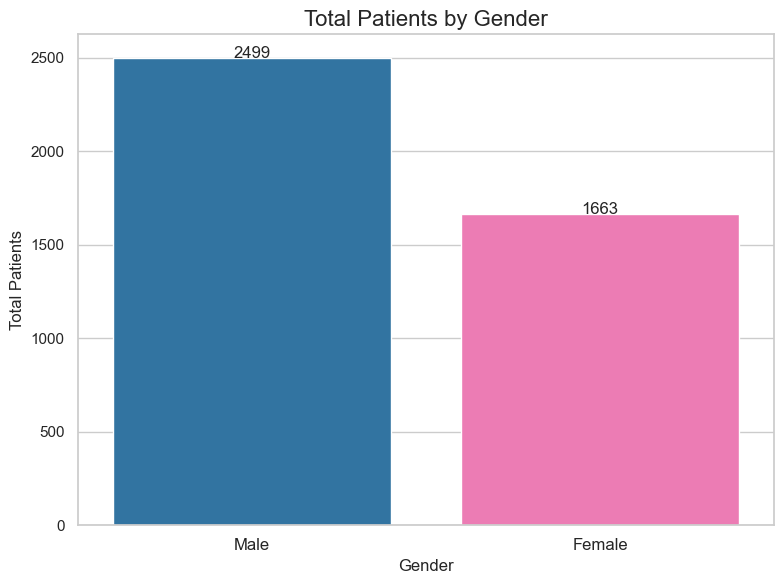

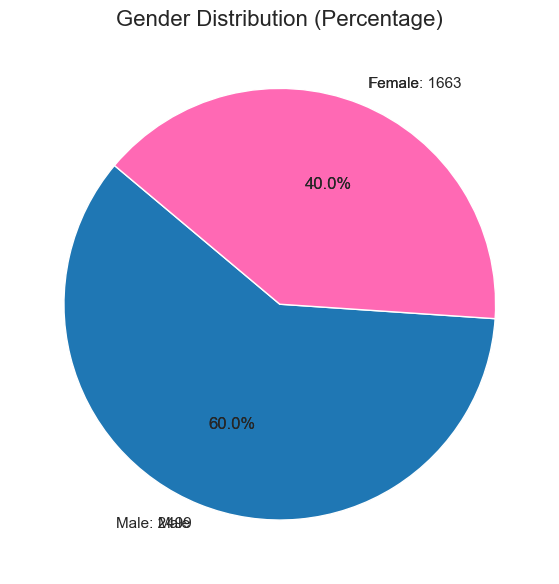


Gender Statistics Summary:
   Gender  Count  Percentage
0    Male   2499   60.043248
1  Female   1663   39.956752


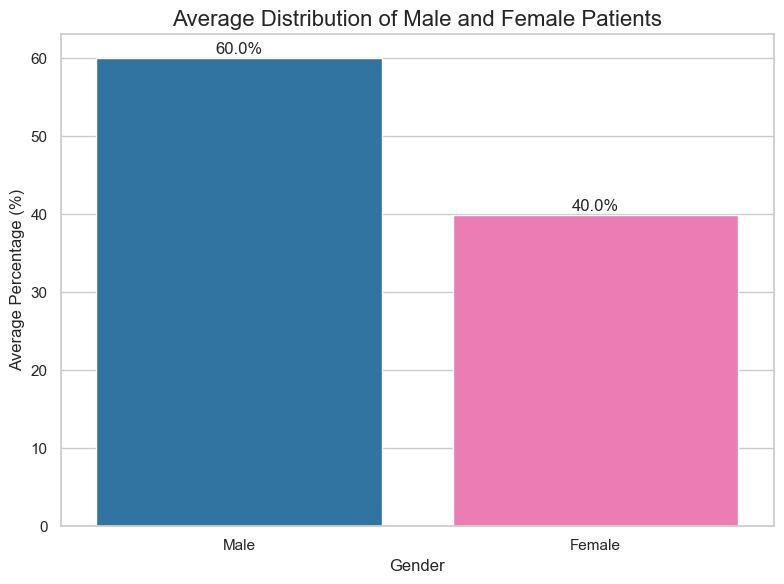

In [11]:
# סטטיסטיקה למגדר
# קביעת פונטים באנגלית
matplotlib.rcParams['font.family'] = 'Arial'

# קריאה לקובץ האקסל

df = pd.read_excel(input_file)

# הסרת כפילויות לפי "מספר מטופל רנדומלי"
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# חישוב התפלגות מגדרית (0 = זכר, 1 = נקבה)
gender_counts = df_unique['נקבה'].value_counts()
total_patients = gender_counts.sum()

# חישוב ממוצע ואחוזים
gender_percentages = (gender_counts / total_patients) * 100

# יצירת גרף עמודות להצגת סך כל המטופלים לפי מגדר
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff69b4']  # כחול לזכר וורוד לנקבה
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette=colors, legend=False)
plt.title('Total Patients by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Patients', fontsize=12)
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)
for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 1, f"{v}", ha='center', fontsize=12)

# שמירה של הגרף
output_dir = os.path.join(project_root, "Statistics_Updates", "Update 1-Gender Statistics")
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "gender_distribution_total_patients.png")
plt.tight_layout()
plt.savefig(output_file, format='png')  # שמירה ב-PNG
plt.show()

# יצירת גרף עוגה להצגת אחוזי ההתפלגות
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, labels=['Male', 'Female'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Gender Distribution (Percentage)', fontsize=16)

# הוספת כמות מספרית לכל חלק בעוגה
plt.pie(gender_counts.values, labels=[f'Male: {gender_counts[0]}', f'Female: {gender_counts[1]}'],
        autopct='%1.1f%%', colors=colors, startangle=140)

# שמירה של גרף העוגה
output_file_pie = os.path.join(output_dir, "gender_distribution_percentage.png")
plt.tight_layout()
plt.savefig(output_file_pie, format='png')  # שמירה ב-PNG
plt.show()

# יצירת טבלה להדפסה עם ממוצע, אחוזים וסכום
gender_summary = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': gender_counts.values,
    'Percentage': gender_percentages.values
})

print("\nGender Statistics Summary:")
print(gender_summary)

# חישוב ממוצע של כל מגדר
avg_male = (gender_counts[0] / total_patients) * 100
avg_female = (gender_counts[1] / total_patients) * 100

# יצירת DataFrame עם ממוצעים
avg_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Average Percentage': [avg_male, avg_female]
})

# יצירת גרף עמודות להצגת ממוצע מטופלים לפי מגדר
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Average Percentage', data=avg_df, hue='Gender', palette=colors)
plt.title('Average Distribution of Male and Female Patients', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Percentage (%)', fontsize=12)
for i, v in enumerate([avg_male, avg_female]):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=12)

# שמירה של גרף הממוצע
output_file_avg = os.path.join(output_dir, "gender_average_distribution.png")
plt.tight_layout()
plt.savefig(output_file_avg, format='png')  # שמירה ב-PNG
plt.show()


Mean Age: 40.61
Median Age: 38.0
Standard Deviation: 16.20
Min Age: 18
Max Age: 94
Mode Age: 24
Range of Age: 76
25th Percentile: 27.00
75th Percentile: 51.00
Shapiro-Wilk Test: Statistic=0.945, p-value=0.000


C:\Users\hadma\AppData\Local\Temp\ipykernel_21240\2053737175.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Age Group'] = pd.cut(df_unique['גיל אשפוז'], bins=age_bins, labels=age_labels, right=False)
C:\Users\hadma\AppData\Local\Temp\ipykernel_21240\2053737175.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
C:\Users\hadma\AppData\Local\Temp\ipykernel_21240\2053737175.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

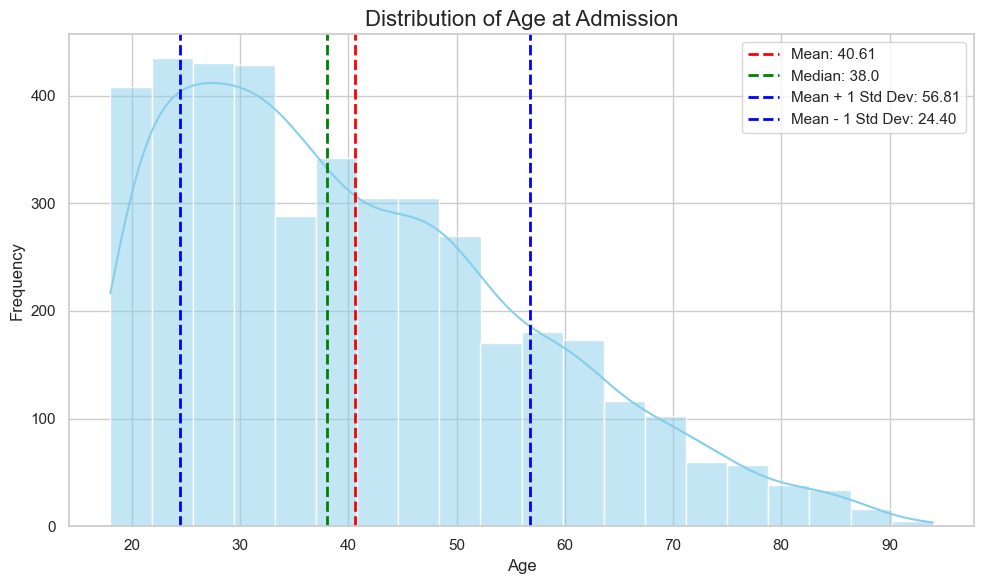

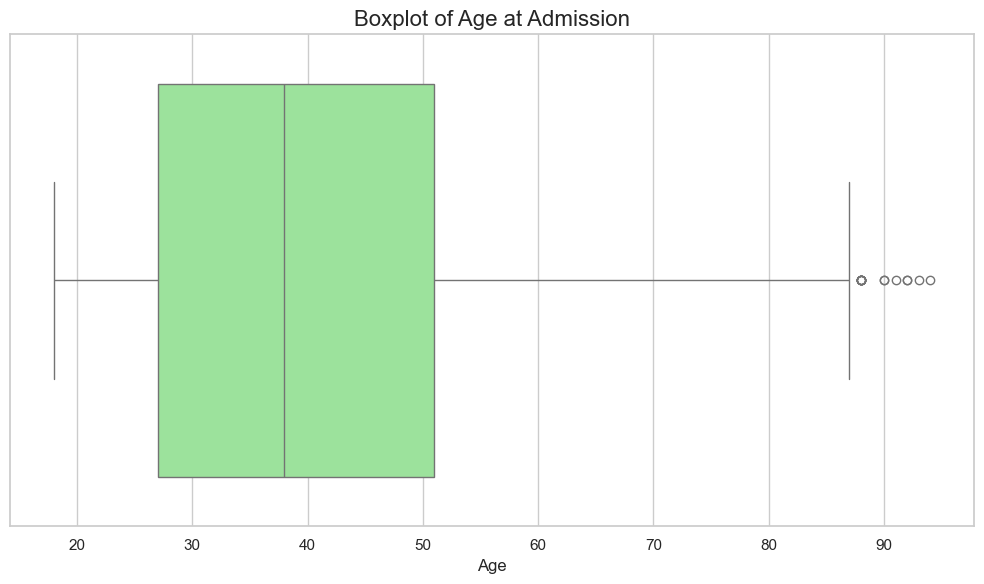

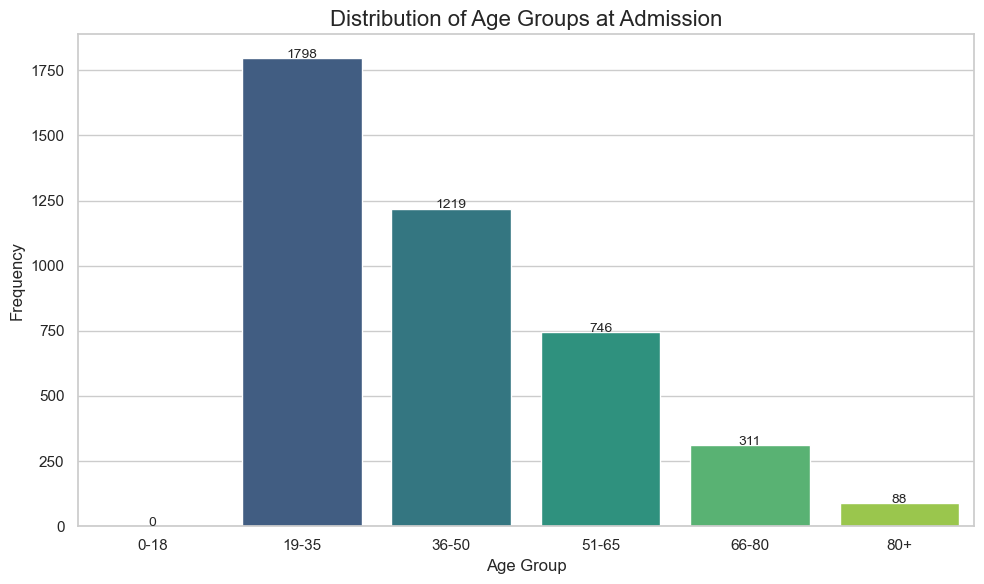

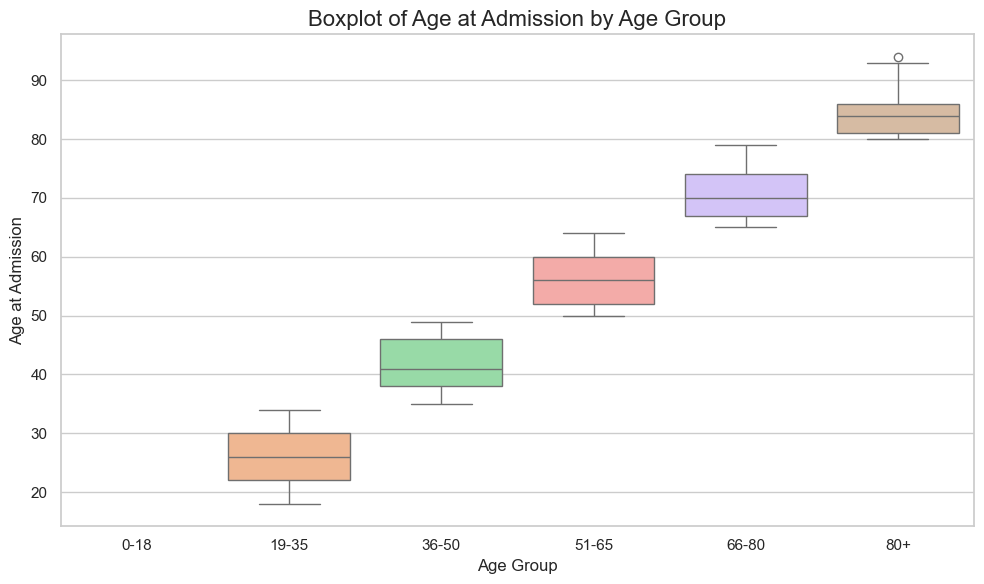

In [12]:
# סטטיסטיקה לגיל אשפוז
# 1. קביעת פונטים באנגלית
matplotlib.rcParams['font.family'] = 'Arial'

# 2. קריאה לקובץ אקסל

df = pd.read_excel(input_file)

# 3. הסרת כפילויות לפי "מספר מטופל רנדומלי"
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# 4. חישוב סטטיסטיקות בסיסיות
mean_age = df_unique['גיל אשפוז'].mean()
median_age = df_unique['גיל אשפוז'].median()
std_age = df_unique['גיל אשפוז'].std()
min_age = df_unique['גיל אשפוז'].min()
max_age = df_unique['גיל אשפוז'].max()
mode_age = df_unique['גיל אשפוז'].mode()[0]
age_range = max_age - min_age

# אחוזונים
percentiles = df_unique['גיל אשפוז'].quantile([0.25, 0.5, 0.75])

# בדיקת נורמליות
shapiro_stat, shapiro_p = shapiro(df_unique['גיל אשפוז'])

# הצגת הסטטיסטיקות
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation: {std_age:.2f}")
print(f"Min Age: {min_age}")
print(f"Max Age: {max_age}")
print(f"Mode Age: {mode_age}")
print(f"Range of Age: {age_range}")
print(f"25th Percentile: {percentiles[0.25]:.2f}")
print(f"75th Percentile: {percentiles[0.75]:.2f}")
print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3f}")

# 5. יצירת תיקיית פלט
output_dir = os.path.join(project_root, "Statistics_Updates", "Update 2- Hospitalization Age Statistics")
os.makedirs(output_dir, exist_ok=True)

# 6. היסטוגרמה משודרגת
plt.figure(figsize=(10, 6))
sns.histplot(df_unique['גיל אשפוז'], kde=True, color='skyblue', bins=20)
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age}')
plt.axvline(mean_age + std_age, color='blue', linestyle='dashed', linewidth=2, label=f'Mean + 1 Std Dev: {mean_age + std_age:.2f}')
plt.axvline(mean_age - std_age, color='blue', linestyle='dashed', linewidth=2, label=f'Mean - 1 Std Dev: {mean_age - std_age:.2f}')
plt.title('Distribution of Age at Admission', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
output_file_hist = os.path.join(output_dir, "age_distribution_histogram.png")
plt.savefig(output_file_hist, format='png')

# 7. Boxplot משודרג
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_unique['גיל אשפוז'], color='lightgreen')
plt.title('Boxplot of Age at Admission', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.tight_layout()
output_file_boxplot = os.path.join(output_dir, "age_distribution_boxplot.png")
plt.savefig(output_file_boxplot, format='png')

# 8. גרף קבוצות גיל
age_bins = [0, 18, 35, 50, 65, 80, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '80+']
df_unique['Age Group'] = pd.cut(df_unique['גיל אשפוז'], bins=age_bins, labels=age_labels, right=False)

# תדירות קבוצות גיל
age_group_counts = df_unique['Age Group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('Distribution of Age Groups at Admission', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# הוספת ערכים לגרף
for index, value in enumerate(age_group_counts.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10)

plt.tight_layout()
output_file_bar = os.path.join(output_dir, "age_group_distribution_bar_chart.png")
plt.savefig(output_file_bar, format='png')

# 9. גרף קופסה לפי קבוצות גיל
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='גיל אשפוז', data=df_unique, palette='pastel')
plt.title('Boxplot of Age at Admission by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Age at Admission', fontsize=12)
plt.tight_layout()
output_file_boxplot_group = os.path.join(output_dir, "age_group_boxplot.png")
plt.savefig(output_file_boxplot_group, format='png')

# 10. הצגת כל הגרפים
plt.show()


Mean Number of Children: 0.91
Median Number of Children: 0.0
Standard Deviation: 1.51


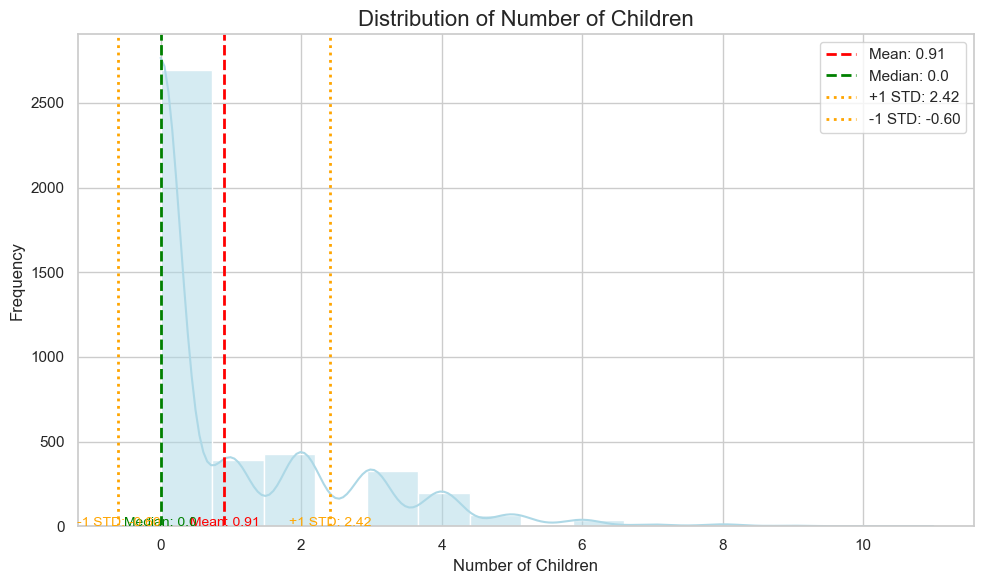

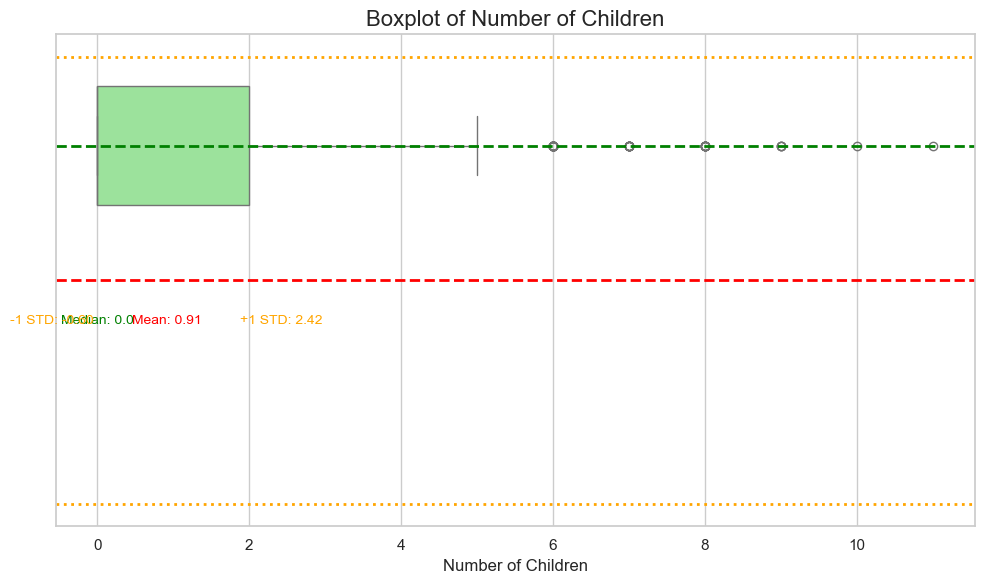

In [32]:
# סטטיסטיקות למספר ילדים - רן
# 1. קביעת פונטים באנגלית
matplotlib.rcParams['font.family'] = 'Arial'  # פונט מומלץ לאנגלית

# 2. קריאה לקובץ אקסל
df = pd.read_excel(input_file)

# 3. הסרת כפילויות לפי "מספר מטופל רנדומלי"
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# 4. חישוב סטטיסטיקות על מספר ילדים
mean_children = df_unique['מספר ילדים'].mean()  # ממוצע מספר ילדים
median_children = df_unique['מספר ילדים'].median()  # חציון מספר ילדים
std_children = df_unique['מספר ילדים'].std()  # סטיית תקן

# הצגת הסטטיסטיקות
print(f"Mean Number of Children: {mean_children:.2f}")
print(f"Median Number of Children: {median_children}")
print(f"Standard Deviation: {std_children:.2f}")

# 5. יצירת היסטוגרמה למספר ילדים
plt.figure(figsize=(10, 6))
sns.histplot(df_unique['מספר ילדים'], kde=True, color='lightblue', bins=15)

# הוספת קווים של ממוצע, חציון וסטיית תקן
plt.axvline(mean_children, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_children:.2f}')
plt.axvline(median_children, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_children}')
plt.axvline(mean_children + std_children, color='orange', linestyle='dotted', linewidth=2, label=f'+1 STD: {mean_children + std_children:.2f}')
plt.axvline(mean_children - std_children, color='orange', linestyle='dotted', linewidth=2, label=f'-1 STD: {mean_children - std_children:.2f}')

# כיתוב על קווים, עם מיקום ברור יותר
plt.text(mean_children, 3, f'Mean: {mean_children:.2f}', horizontalalignment='center', color='red', fontsize=10)
plt.text(median_children, 3, f'Median: {median_children}', horizontalalignment='center', color='green', fontsize=10)
plt.text(mean_children + std_children, 3, f'+1 STD: {mean_children + std_children:.2f}', horizontalalignment='center', color='orange', fontsize=10)
plt.text(mean_children - std_children, 3, f'-1 STD: {mean_children - std_children:.2f}', horizontalalignment='center', color='orange', fontsize=10)

# כותרת וצירים
plt.title('Distribution of Number of Children', fontsize=16)
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()

# 6. שמירת ההיסטוגרמה
output_dir = os.path.join(project_root, "Statistics_Updates", "Update 3-Statistics for the number of children")
os.makedirs(output_dir, exist_ok=True)

output_file_hist = os.path.join(output_dir, "children_distribution_histogram.png")
plt.savefig(output_file_hist, format='png')

# 7. יצירת גרף Boxplot למספר ילדים
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_unique['מספר ילדים'], color='lightgreen')

# הוספת קווים ומידע ב-Boxplot
plt.axhline(median_children, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_children}')
plt.axhline(mean_children, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_children:.2f}')
plt.axhline(mean_children + std_children, color='orange', linestyle='dotted', linewidth=2, label=f'+1 STD: {mean_children + std_children:.2f}')
plt.axhline(mean_children - std_children, color='orange', linestyle='dotted', linewidth=2, label=f'-1 STD: {mean_children - std_children:.2f}')

# כיתוב ב-Boxplot
plt.text(mean_children, 1.2, f'Mean: {mean_children:.2f}', horizontalalignment='center', color='red', fontsize=10)
plt.text(median_children, 1.2, f'Median: {median_children}', horizontalalignment='center', color='green', fontsize=10)
plt.text(mean_children + std_children, 1.2, f'+1 STD: {mean_children + std_children:.2f}', horizontalalignment='center', color='orange', fontsize=10)
plt.text(mean_children - std_children, 1.2, f'-1 STD: {mean_children - std_children:.2f}', horizontalalignment='center', color='orange', fontsize=10)

# כותרת וצירים
plt.title('Boxplot of Number of Children', fontsize=16)
plt.xlabel('Number of Children', fontsize=12)
plt.tight_layout()

# 8. שמירת גרף Boxplot
output_file_boxplot = os.path.join(output_dir, "children_distribution_boxplot.png")
plt.savefig(output_file_boxplot, format='png')

# הצגת הגרפים
plt.show()


In [ ]:
# סטטיסטיקה למחלקות

# קריאת קובץ Excel
df = pd.read_excel(input_file)

# הסרת כפילויות על פי מספר מטופל רנדומלי
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# המרת שמות עמודות לעברית לאנגלית
columns_translation = {
    'יחידה רפואית_רפואית ממושכת ב': 'Extended Medical Unit B',
    'יחידה רפואית_רפואית ממושכת ג': 'Extended Medical Unit C',
    'יחידה רפואית_רפואית פעילה א': 'Active Medical Unit A',
    'יחידה רפואית_רפואית פעילה אשפוז יום': 'Day Hospital Active Unit',
    'יחידה רפואית_רפואית פעילה ב': 'Active Medical Unit B',
    'יחידה רפואית_רפואית פעילה ג': 'Active Medical Unit C',
    'יחידה רפואית_רפואית פעילה ד': 'Active Medical Unit D',
    'יחידה רפואית_רפואית פעילה ה': 'Active Medical Unit E'
}

# שינוי שם העמודות
df = df.rename(columns=columns_translation)

# עמודות שמתארות את היחידות הרפואיות באנגלית
medical_units_english = [
    'Extended Medical Unit B', 'Extended Medical Unit C', 'Active Medical Unit A', 
    'Day Hospital Active Unit', 'Active Medical Unit B', 'Active Medical Unit C', 
    'Active Medical Unit D', 'Active Medical Unit E'
]

# צבעים שונים לכל יחידה רפואית
unit_colors = {
    'Extended Medical Unit B': 'lightcoral',
    'Extended Medical Unit C': 'lightgreen',
    'Active Medical Unit A': 'lightblue',
    'Day Hospital Active Unit': 'lightyellow',
    'Active Medical Unit B': 'lightpink',
    'Active Medical Unit C': 'lightgoldenrodyellow',
    'Active Medical Unit D': 'lightseagreen',
    'Active Medical Unit E': 'lightsalmon'
}

# ספירת מספר המטופלים (ספירת 1ים) בכל עמודה
patients_per_unit = df[medical_units_english].sum()

# הגדרת תיקיית שמירה
output_dir = output_dir = os.path.join(project_root, "Statistics_Updates", "Update 4-Medical Units Analysis")
os.makedirs(output_dir, exist_ok=True)

# יצירת גרף לכל יחידה רפואית בנפרד ושמירה
for unit in medical_units_english:
    plt.figure(figsize=(6, 4))
    ax = df[unit].value_counts().plot(kind='bar', color=unit_colors[unit], title=f'Patients in {unit}')
    plt.xlabel('Patient Status (1 = Present, 0 = Absent)', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')
    plt.xticks(rotation=0)
    plt.title(f'Patients in {unit}', fontsize=16, fontweight='bold')
    
    # הוספת כמות מטופלים מעל כל עמודה
    for i in ax.patches:
        ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    # שמירה בתיקייה
    output_file = os.path.join(output_dir, f'{unit.replace(" ", "_")}_patients.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# יצירת גרף השוואתי לכל היחידות הרפואיות ושמירה
plt.figure(figsize=(10, 6))
ax = patients_per_unit.plot(kind='bar', color=[unit_colors[unit] for unit in medical_units_english])
plt.title('Number of Patients per Medical Unit', fontsize=16, fontweight='bold')
plt.xlabel('Medical Unit', fontsize=14, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')
plt.xticks(range(len(medical_units_english)), medical_units_english, rotation=45, ha='right')

# הוספת כמות מטופלים על כל עמודת בר
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_comparison = os.path.join(output_dir, 'patients_comparison.png')
plt.tight_layout()
plt.savefig(output_file_comparison)
plt.close()

print(f"גרפים נשמרו בהצלחה בתיקייה: {output_dir}")


In [ ]:
# סטטיסטיקה מצב משפחתי

# קריאת קובץ Excel
df = pd.read_excel(input_file)

# הסרת כפילויות על פי מספר מטופל רנדומלי
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# המרת שמות עמודות לעברית לאנגלית
columns_translation = {
    'מצב משפחתי_אלמן/ה': 'Marital Status_Widowed',
    'מצב משפחתי_גרוש/ה': 'Marital Status_Divorced',
    'מצב משפחתי_לא ידוע': 'Marital Status_Unknown',
    'מצב משפחתי_נשוי/א': 'Marital Status_Married',
    'מצב משפחתי_רווק/ה': 'Marital Status_Single'
}

# שינוי שם העמודות
df = df.rename(columns=columns_translation)

# עמודות המצב המשפחתי באנגלית
marital_status_columns = [
    'Marital Status_Widowed', 'Marital Status_Divorced', 'Marital Status_Unknown', 
    'Marital Status_Married', 'Marital Status_Single'
]

# צבעים שונים לכל מצב משפחתי
status_colors = {
    'Marital Status_Widowed': 'lightgray',
    'Marital Status_Divorced': 'lightblue',
    'Marital Status_Unknown': 'lightgreen',
    'Marital Status_Married': 'lightpink',
    'Marital Status_Single': 'lightyellow'
}

# ספירת מספר המטופלים (ספירת 1ים) בכל עמודה של מצב משפחתי
status_counts = df[marital_status_columns].sum()

# חישוב אחוזים עבור כל מצב משפחתי
status_percentage = (status_counts / status_counts.sum()) * 100

# הגדרת תיקיית שמירה
output_dir = os.path.join(project_root, "Statistics_Updates", "Update 5- family Status Analysis")
os.makedirs(output_dir, exist_ok=True)

# יצירת גרף לכל מצב משפחתי בנפרד ושמירה
for status in marital_status_columns:
    plt.figure(figsize=(6, 4))
    ax = df[status].value_counts().plot(kind='bar', color=status_colors[status], title=f'Patients Marital Status: {status}')
    plt.xlabel('Marital Status (1 = Present, 0 = Absent)', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')
    plt.xticks(rotation=0)
    plt.title(f'Patients Marital Status: {status}', fontsize=16, fontweight='bold')
    
    # הוספת כמות מטופלים מעל כל עמודה
    for i in ax.patches:
        ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    # שמירה בתיקייה
    output_file = os.path.join(output_dir, f'{status.replace(" ", "_")}_patients.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# יצירת גרף השוואתי לכל המצב המשפחתי ושמירה
plt.figure(figsize=(10, 6))
ax = status_counts.plot(kind='bar', color=[status_colors[status] for status in marital_status_columns])
plt.title('Number of Patients by Marital Status', fontsize=16, fontweight='bold')
plt.xlabel('Marital Status', fontsize=14, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')
plt.xticks(range(len(marital_status_columns)), marital_status_columns, rotation=45, ha='right')

# הוספת כמות מטופלים על כל עמודת בר
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_comparison = os.path.join(output_dir, 'marital_status_comparison.png')
plt.tight_layout()
plt.savefig(output_file_comparison)
plt.close()

# יצירת גרף אחוזים עבור כל מצב משפחתי כגרף פאי (דונאט)
plt.figure(figsize=(8, 8))
ax = plt.gca()

# יצירת גרף דונאט
wedges, texts, autotexts = ax.pie(status_percentage, 
                                  labels=marital_status_columns, 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  colors=[status_colors[status] for status in marital_status_columns],
                                  wedgeprops=dict(width=0.4))

# עיצוב טקסטים (אם רוצים לשנות גופן או גודל)
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# הוספת כותרת לגרף
plt.title('Percentage of Patients by Marital Status', fontsize=16, fontweight='bold')

# שמירה בתיקייה
output_file_percentage_comparison = os.path.join(output_dir, 'marital_status_percentage_comparison_donut.png')
plt.tight_layout()
plt.savefig(output_file_percentage_comparison)
plt.close()

print(f"גרפים נשמרו בהצלחה בתיקייה: {output_dir}")


In [ ]:
# סטטסיטיקה לגורם מפנה
# המרת שמות עמודות לעברית לאנגלית עבור גורם מפנה עם שמות ברורים יותר
referral_columns_translation = {
    'קטגוריית גורם מפנה_בית חולים': 'Hospital Referral',
    'קטגוריית גורם מפנה_גורמי משפט וביטחון': 'Legal & Security Referral',
    'קטגוריית גורם מפנה_גורמים לא ידועים': 'Unknown Causes Referral',
    'קטגוריית גורם מפנה_גורמים עצמיים/פרטיים': 'Private Causes Referral',
    'קטגוריית גורם מפנה_גורמים ציבוריים ושירותי רווחה': 'Public & Welfare Services Referral',
    'קטגוריית גורם מפנה_גורמים רפואיים אחרים': 'Other Medical Causes Referral',
    'קטגוריית גורם מפנה_מוסד רפואי אחר': 'Another Medical Institution Referral',
    'קטגוריית גורם מפנה_פניה עצמית': 'Self Referral',
    'קטגוריית גורם מפנה_פסיכיאטר מחוזי': 'District Psychiatrist Referral',
    'קטגוריית גורם מפנה_קופות חולים': 'Health Funds Referral'
}

# שינוי שם העמודות של גורם מפנה
df = df.rename(columns=referral_columns_translation)

# עמודות הגורמים המפנים באנגלית עם שמות מובנים
referral_columns = [
    'Hospital Referral', 
    'Legal & Security Referral',
    'Unknown Causes Referral',
    'Private Causes Referral',
    'Public & Welfare Services Referral',
    'Other Medical Causes Referral',
    'Another Medical Institution Referral',
    'Self Referral',
    'District Psychiatrist Referral',
    'Health Funds Referral'
]

# צבעים שונים לכל גורם מפנה
referral_colors = {
    'Hospital Referral': 'lightblue',
    'Legal & Security Referral': 'lightgreen',
    'Unknown Causes Referral': 'lightgray',
    'Private Causes Referral': 'lightyellow',
    'Public & Welfare Services Referral': 'lightpink',
    'Other Medical Causes Referral': 'lightcyan',
    'Another Medical Institution Referral': 'lightcoral',
    'Self Referral': 'lightgoldenrodyellow',
    'District Psychiatrist Referral': 'lightseagreen',
    'Health Funds Referral': 'lightsteelblue'
}

# ספירת מספר המטופלים (ספירת 1ים) בכל עמודה של גורם מפנה
referral_counts = df[referral_columns].sum()
# הסרת כפילויות על פי מספר מטופל רנדומלי
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')
# חישוב אחוזים עבור כל גורם מפנה
referral_percentage = (referral_counts / referral_counts.sum()) * 100

# שינוי גודל הגרפים והכותרות
for referral in referral_columns:
    plt.figure(figsize=(8, 6))  # הגדלת הגרף
    ax = df[referral].value_counts().plot(kind='bar', color=referral_colors[referral], title=f'Patients Referral: {referral}')
    plt.xlabel('Referral (1 = Present, 0 = Absent)', fontsize=16, fontweight='bold')  # הגדלת הפונט
    plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')  # הגדלת הפונט
    plt.xticks(rotation=0, fontsize=14)
    plt.title(f'Patients Referral: {referral}', fontsize=18, fontweight='bold')
    
    # הוספת כמות מטופלים מעל כל עמודה
    for i in ax.patches:
        ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                    ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    # שמירה בתיקייה
    output_file = os.path.join(output_dir, f'{referral.replace(" ", "_")}_patients.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# גרף השוואתי עבור כל הגורמים המפנים
plt.figure(figsize=(12, 8))  # הגדלת הגרף
ax = referral_counts.plot(kind='bar', color=[referral_colors[referral] for referral in referral_columns])
plt.title('Number of Patients by Referral Category', fontsize=18, fontweight='bold')  # הגדלת הפונט
plt.xlabel('Referral Category', fontsize=16, fontweight='bold')  # הגדלת הפונט
plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')  # הגדלת הפונט
plt.xticks(range(len(referral_columns)), referral_columns, rotation=45, ha='right', fontsize=14)  # הגדלת הפונט

# הוספת כמות מטופלים על כל עמודת בר
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_comparison = os.path.join(output_dir, 'referral_category_comparison.png')
plt.tight_layout()
plt.savefig(output_file_comparison)
plt.close()

# גרף אחוזים עבור כל גורם מפנה כגרף פאי (דונאט)
plt.figure(figsize=(14, 14))  # הגדלת הגרף עוד יותר

ax = plt.gca()

# יצירת גרף דונאט עם אחוזים וכמויות
wedges, texts, autotexts = ax.pie(referral_percentage, 
                                  labels=referral_columns, 
                                  autopct='%1.1f%%\n(%1.0f)', 
                                  startangle=90, 
                                  colors=[referral_colors[referral] for referral in referral_columns],
                                  wedgeprops=dict(width=0.4))

# עיצוב טקסטים
for text in texts + autotexts:
    text.set_fontsize(16)  # גודל פונט גדול יותר
    text.set_fontweight('bold')
    text.set_position((0, 0))  # מיקום טקסט ברור יותר במרכז החלקים

# שיפור מיקום השמות
plt.setp(texts, ha='center', fontsize=14, fontweight='bold')  # היישור למרכז והגדלת הפונט
plt.setp(autotexts, ha='center', fontsize=14, fontweight='bold')

# הוספת כותרת לגרף
plt.title('Percentage and Count of Patients by Referral Category', fontsize=18, fontweight='bold')

# שמירה בתיקייה
output_file_percentage_comparison = os.path.join(output_dir, 'referral_category_percentage_comparison_donut.png')
plt.tight_layout()
plt.savefig(output_file_percentage_comparison)
plt.close()

print(f"גרפים נשמרו בהצלחה בתיקייה: {output_dir}")



In [ ]:
# סטטיסטיקה להופנה ל

# שם תיקיית השמירה החדש
output_dir = os.path.join('Statistics_Updates', 'Update 8-Referral Categories Analysis')

# אם התיקייה לא קיימת, ניצור אותה
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# המרת שמות עמודות לעברית לאנגלית עבור גורם מפנה
referral_columns_translation = {
    'קטגוריית הופנה ל_אחרים': 'Other Referrals',
    'קטגוריית הופנה ל_אשפוז': 'Hospital Referral',
    'קטגוריית הופנה ל_גורמים משפטיים': 'Legal Referral',
    'קטגוריית הופנה ל_טיפול': 'Treatment Referral',
    'קטגוריית הופנה ל_טיפול מרפאתי': 'Outpatient Treatment Referral',
    'קטגוריית הופנה ל_מוסדות': 'Institutional Referral',
    'קטגוריית הופנה ל_מרפאה פסיכיאטרית': 'Psychiatric Clinic Referral',
    'קטגוריית הופנה ל_קהילה ורווחה': 'Community & Welfare Referral',
    'קטגוריית הופנה ל_רופא מטפל': 'Attending Doctor Referral',
    'קטגוריית הופנה ל_ריק': 'Empty Referral'
}

# שינוי שם העמודות של גורם מפנה
df = df.rename(columns=referral_columns_translation)
# הסרת כפילויות על פי מספר מטופל רנדומלי
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')
# עמודות הגורמים המפנים באנגלית עם שמות מובנים
referral_columns = [
    'Other Referrals', 
    'Hospital Referral', 
    'Legal Referral',
    'Treatment Referral', 
    'Outpatient Treatment Referral', 
    'Institutional Referral', 
    'Psychiatric Clinic Referral', 
    'Community & Welfare Referral',
    'Attending Doctor Referral', 
    'Empty Referral'
]

# צבעים שונים לכל גורם מפנה
referral_colors = {
    'Other Referrals': 'lightblue',
    'Hospital Referral': 'lightgreen',
    'Legal Referral': 'lightpink',
    'Treatment Referral': 'lightyellow',
    'Outpatient Treatment Referral': 'lightcyan',
    'Institutional Referral': 'lightcoral',
    'Psychiatric Clinic Referral': 'lightseagreen',
    'Community & Welfare Referral': 'lightsteelblue',
    'Attending Doctor Referral': 'lightgoldenrodyellow',
    'Empty Referral': 'lightgray'
}

# ספירת מספר המטופלים (ספירת 1ים) בכל עמודה של גורם מפנה
referral_counts = df[referral_columns].sum()

# חישוב אחוזים עבור כל גורם מפנה
referral_percentage = (referral_counts / referral_counts.sum()) * 100

# יצירת גרפים עבור כל קטגוריה
for referral in referral_columns:
    plt.figure(figsize=(8, 6))  # הגדלת הגרף
    ax = df[referral].value_counts().plot(kind='bar', color=referral_colors[referral], title=f'Patients Referral: {referral}')
    plt.xlabel('Referral (1 = Present, 0 = Absent)', fontsize=16, fontweight='bold')  # הגדלת הפונט
    plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')  # הגדלת הפונט
    plt.xticks(rotation=0, fontsize=14)
    plt.title(f'Patients Referral: {referral}', fontsize=18, fontweight='bold')
    
    # הוספת כמות מטופלים מעל כל עמודה
    for i in ax.patches:
        ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                    ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    # שמירה בתיקייה
    output_file = os.path.join(output_dir, f'{referral.replace(" ", "_")}_patients.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# גרף השוואתי עבור כל הגורמים המפנים
plt.figure(figsize=(12, 8))  # הגדלת הגרף
ax = referral_counts.plot(kind='bar', color=[referral_colors[referral] for referral in referral_columns])
plt.title('Number of Patients by Referral Category', fontsize=18, fontweight='bold')  # הגדלת הפונט
plt.xlabel('Referral Category', fontsize=16, fontweight='bold')  # הגדלת הפונט
plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')  # הגדלת הפונט
plt.xticks(range(len(referral_columns)), referral_columns, rotation=45, ha='right', fontsize=14)  # הגדלת הפונט

# הוספת כמות מטופלים על כל עמודת בר
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_comparison = os.path.join(output_dir, 'referral_category_comparison.png')
plt.tight_layout()
plt.savefig(output_file_comparison)
plt.close()

# גרף אחוזים עבור כל גורם מפנה כגרף פאי (דונאט)
plt.figure(figsize=(14, 14))  # הגדלת הגרף עוד יותר

ax = plt.gca()

# יצירת גרף דונאט עם אחוזים וכמויות
wedges, texts, autotexts = ax.pie(referral_percentage, 
                                  labels=referral_columns, 
                                  autopct='%1.1f%%\n(%1.0f)', 
                                  startangle=90, 
                                  colors=[referral_colors[referral] for referral in referral_columns],
                                  wedgeprops=dict(width=0.4))

# עיצוב טקסטים
for text in texts + autotexts:
    text.set_fontsize(16)  # גודל פונט גדול יותר
    text.set_fontweight('bold')
    text.set_position((0, 0))  # מיקום טקסט ברור יותר במרכז החלקים

# שיפור מיקום השמות
plt.setp(texts, ha='center', fontsize=14, fontweight='bold')  # היישור למרכז והגדלת הפונט
plt.setp(autotexts, ha='center', fontsize=14, fontweight='bold')

# הוספת כותרת לגרף
plt.title('Percentage and Count of Patients by Referral Category', fontsize=18, fontweight='bold')

# שמירה בתיקייה
output_file_percentage_comparison = os.path.join(output_dir, 'referral_category_percentage_comparison_donut.png')
plt.tight_layout()
plt.savefig(output_file_percentage_comparison)
plt.close()

print(f"גרפים נשמרו בהצלחה בתיקייה: {output_dir}")


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# שם תיקיית השמירה החדש
output_dir = os.path.join('Statistics_Updates', 'Update 9-Legal Status Analysis')

# קריאת הקובץ לעורך DataFrame
df = pd.read_excel(input_file)

# הורדת כפילויות
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# אם התיקייה לא קיימת, ניצור אותה
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# המרת שמות עמודות לעברית לאנגלית עבור סטטוס חוקי
status_columns_translation = {
    'קטגוריית סטטוס חוקי_אשפוז בהסכמה': 'Hospitalization_Agreed',
    'קטגוריית סטטוס חוקי_אשפוז כפוי': 'Hospitalization_Forced',
    'קטגוריית סטטוס חוקי_אשפוז כפוי דחוף': 'Hospitalization_Forced_Urgent',
    'קטגוריית סטטוס חוקי_אשפוז כפוי לא דחוף': 'Hospitalization_Forced_NonUrgent',
    'קטגוריית סטטוס חוקי_גורמים משפטיים': 'Legal_Agencies',
    'קטגוריית סטטוס חוקי_ריק': 'Empty'
}

# שינוי שם העמודות של סטטוס חוקי
df = df.rename(columns=status_columns_translation)

# עמודות הסטטוס החוקי באנגלית עם שמות מובנים
status_columns = list(status_columns_translation.values())

# צבעים שונים לכל סטטוס חוקי
status_colors = {
    'Hospitalization_Agreed': 'lightblue',
    'Hospitalization_Forced': 'lightgreen',
    'Hospitalization_Forced_Urgent': 'lightpink',
    'Hospitalization_Forced_NonUrgent': 'lightyellow',
    'Legal_Agencies': 'lightcoral',
    'Empty': 'lightgray'
}

# ספירת מספר המטופלים (ספירת 1ים) בכל עמודה של סטטוס חוקי
status_counts = df[status_columns].sum()

# חישוב אחוזים עבור כל סטטוס חוקי
status_percentage = (status_counts / status_counts.sum()) * 100

# יצירת גרפים עבור כל קטגוריה
for status in status_columns:
    plt.figure(figsize=(10, 6))  # הגדלת הגרף
    ax = df[status].value_counts().plot(kind='bar', color=status_colors[status], title=f'Status: {status}')
    plt.xlabel('Status (1 = Present, 0 = Absent)', fontsize=12, fontweight='bold')  # פונט קטן יותר
    plt.ylabel('Number of Patients', fontsize=12, fontweight='bold')  # פונט קטן יותר
    plt.xticks(rotation=0, fontsize=10)  # פונט קטן יותר
    plt.title(f'Status: {status}', fontsize=14, fontweight='bold')  # פונט קטן יותר

    # הוספת כמות מטופלים מעל כל עמודה
    for i in ax.patches:
        ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    # שמירה בתיקייה
    output_file = os.path.join(output_dir, f'{status}_patients.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# גרף השוואתי עבור כל הסטטוסים החוקיים
plt.figure(figsize=(14, 8))  # הגדלת הגרף
ax = status_counts.plot(kind='bar', color=[status_colors[status] for status in status_columns])
plt.title('Number of Patients by Legal Status', fontsize=16, fontweight='bold')  # פונט גדול יותר
plt.xlabel('Legal Status', fontsize=14, fontweight='bold')  # פונט קטן יותר
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')  # פונט קטן יותר
plt.xticks(range(len(status_columns)), status_columns, rotation=45, ha='right', fontsize=12)  # פונט קטן יותר

# הוספת כמות מטופלים על כל עמודת בר
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_comparison = os.path.join(output_dir, 'legal_status_comparison.png')
plt.tight_layout()
plt.savefig(output_file_comparison)
plt.close()

print(f"גרפים נשמרו בהצלחה בתיקייה: {output_dir}")


גרפים נשמרו בהצלחה בתיקייה: Statistics_Updates\Update 9-Legal Status Analysis


In [13]:
# שם תיקיית השמירה החדש
output_dir = os.path.join('Statistics_Updates', 'Update 10-Origin Area Analysis')

# קריאת הקובץ לעורך DataFrame
df = pd.read_excel(input_file)

# הורדת כפילויות
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# אם התיקייה לא קיימת, ניצור אותה
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# המרת שמות עמודות לעברית לאנגלית עבור אזור מוצא
origin_columns_translation = {
    'אזור מוצא_אפריקה': 'Origin_Africa',
    'אזור מוצא_אתיופיה': 'Origin_Ethiopia',
    'אזור מוצא_ברית המועצות': 'Origin_Soviet_Union',
    'אזור מוצא_דרום אמריקה': 'Origin_South_America',
    'אזור מוצא_ישראל': 'Origin_Israel',
    'אזור מוצא_לא קיים': 'Origin_Not_Exist',
    'אזור מוצא_מזרח אירופה': 'Origin_Eastern_Europe',
    'אזור מוצא_מזרח רחוק': 'Origin_Far_East',
    'אזור מוצא_מערב אירופה': 'Origin_Western_Europe',
    'אזור מוצא_צפון אמריקה': 'Origin_North_America',
    'אזור מוצא_צפון אפריקה והמזרח התיכון': 'Origin_North_Africa_Middle_East'
}

# שינוי שם העמודות של אזור מוצא
df = df.rename(columns=origin_columns_translation)

# עמודות האזור מוצא באנגלית עם שמות מובנים
origin_columns = list(origin_columns_translation.values())

# צבעים שונים לכל אזור מוצא
origin_colors = {
    'Origin_Africa': 'lightblue',
    'Origin_Ethiopia': 'lightgreen',
    'Origin_Soviet_Union': 'lightcoral',
    'Origin_South_America': 'lightyellow',
    'Origin_Israel': 'lightgray',
    'Origin_Not_Exist': 'lightpink',
    'Origin_Eastern_Europe': 'lightgreen',
    'Origin_Far_East': 'lightcyan',
    'Origin_Western_Europe': 'lightgoldenrodyellow',
    'Origin_North_America': 'lightseagreen',
    'Origin_North_Africa_Middle_East': 'lightsalmon'
}

# ספירת מספר המטופלים (ספירת 1ים) בכל עמודה של אזור מוצא
origin_counts = df[origin_columns].sum()

# חישוב אחוזים עבור כל אזור מוצא
origin_percentage = (origin_counts / origin_counts.sum()) * 100

# יצירת גרפים עבור כל קטגוריה
for origin in origin_columns:
    plt.figure(figsize=(8, 6))  # הגדלת הגרף
    ax = df[origin].value_counts().plot(kind='bar', color=origin_colors[origin], title=f'Patients Origin Area: {origin}')
    plt.xlabel('Area (1 = Present, 0 = Absent)', fontsize=16, fontweight='bold')  # הגדלת הפונט
    plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')  # הגדלת הפונט
    plt.xticks(rotation=0, fontsize=14)
    plt.title(f'Patients Origin Area: {origin}', fontsize=18, fontweight='bold')

    # הוספת כמות מטופלים מעל כל עמודה
    for i in ax.patches:
        ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                    ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    # שמירה בתיקייה
    output_file = os.path.join(output_dir, f'{origin}_patients.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# גרף השוואתי עבור כל אזורי המוצא
plt.figure(figsize=(12, 8))  # הגדלת הגרף
ax = origin_counts.plot(kind='bar', color=[origin_colors[origin] for origin in origin_columns])
plt.title('Number of Patients by Origin Area', fontsize=18, fontweight='bold')  # הגדלת הפונט
plt.xlabel('Origin Area', fontsize=16, fontweight='bold')  # הגדלת הפונט
plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')  # הגדלת הפונט
plt.xticks(range(len(origin_columns)), origin_columns, rotation=45, ha='right', fontsize=14)  # הגדלת הפונט

# הוספת כמות מטופלים על כל עמודת בר
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_comparison = os.path.join(output_dir, 'origin_area_comparison.png')
plt.tight_layout()
plt.savefig(output_file_comparison)
plt.close()

# גרף אחוזים עבור כל אזור מוצא כגרף עמודות
plt.figure(figsize=(12, 8))  # הגדלת הגרף

# יצירת גרף עמודות עם אחוזים
ax = origin_percentage.plot(kind='bar', color=[origin_colors[origin] for origin in origin_columns])

# עיצוב גרף
plt.title('Percentage of Patients by Origin Area', fontsize=18, fontweight='bold')
plt.xlabel('Origin Area', fontsize=16, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=16, fontweight='bold')
plt.xticks(range(len(origin_columns)), origin_columns, rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# הוספת כמות מטופלים מעל כל עמודת בר
for i in ax.patches:
    ax.annotate(f'{i.get_height():.1f}%', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_percentage_comparison = os.path.join(output_dir, 'origin_area_percentage_comparison_bar.png')
plt.tight_layout()
plt.savefig(output_file_percentage_comparison)
plt.close()


In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# שם תיקיית השמירה החדש
output_dir = os.path.join('Statistics_Updates', 'Update 11-Age_Analysis')

# קריאת הקובץ לעורך DataFrame
df = pd.read_excel(input_file)

# הורדת כפילויות
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# אם התיקייה לא קיימת, ניצור אותה
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# המרת שם העמודה 'גיל עליה' באנגלית
df = df.rename(columns={'גיל עליה': 'Aliyah_Age'})

# סינון שורות בהן יש ערך 'NaN' בעמודת 'Aliyah_Age' (מטופלים שנולדו בארץ)
df_aliyah = df[df['Aliyah_Age'].notna()].copy()

# יצירת טווחי גילאים
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
df_aliyah['Age_Range'] = pd.cut(df_aliyah['Aliyah_Age'], bins=bins, labels=labels, right=False)

# גרף התפלגות גילאים כ-היסטוגרם עם צבעים ברורים
plt.figure(figsize=(12, 8))
ax = df_aliyah['Aliyah_Age'].plot(kind='hist', bins=bins, color=plt.cm.Paired.colors[:len(bins)-1], edgecolor='black', alpha=0.7)

# הוספת תוויות וגריד
plt.title('Age Distribution of Patients Who Immigrated to Israel', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=16, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')
plt.xticks(np.arange(0, 101, 10), fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# הוספת הערך מעל כל עמודה בגרף היסטוגרם
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

# שמירה בתיקייה
output_file_histogram = os.path.join(output_dir, 'age_distribution_aliyah_histogram.png')
plt.tight_layout()
plt.savefig(output_file_histogram)
plt.close()

# גרף Bar Plot להתפלגות גילאים
age_range_counts = df_aliyah['Age_Range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_range_counts.plot(kind='bar', color=plt.cm.Paired.colors[:len(age_range_counts)], edgecolor='black')

# הוספת תוויות וגריד
plt.title('Age Range Distribution of Patients Who Immigrated to Israel', fontsize=18, fontweight='bold')
plt.xlabel('Age Range', fontsize=16, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# הוספת הערכים על כל בר בגרף
for i, v in enumerate(age_range_counts):
    plt.text(i, v + 1, str(v), ha='center', fontsize=14, color='black')

# שמירה בתיקייה
output_file_bar_plot = os.path.join(output_dir, 'age_range_distribution_aliyah_bar.png')
plt.tight_layout()
plt.savefig(output_file_bar_plot)
plt.close()

# גרף Boxplot להמחשת התפלגות גילאים, חציון ורבעונים
plt.figure(figsize=(12, 8))
plt.boxplot(df_aliyah['Aliyah_Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'),
            whiskerprops=dict(color='blue'), flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

plt.title('Boxplot of Age for Patients Who Immigrated to Israel', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=16, fontweight='bold')
plt.yticks([1], ['Age'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# שמירה בתיקייה
output_file_boxplot = os.path.join(output_dir, 'age_boxplot_aliyah.png')
plt.tight_layout()
plt.savefig(output_file_boxplot)
plt.close()


In [ ]:
#תיקון באג של 0 בעמודת ימי אשפוז ברוטו כולל החלפת סטטו קבלה

# קריאת הקובץ
input_file = os.path.join(project_root, "Excel_Updates", "Update 27 - Processed Dummy Data with Gross Hospitalization Days", "df_with_gross_hospitalization_days")
df = pd.read_excel(input_file)

df = pd.read_excel(file_path)

# שם העמודה שצריך לעדכן
column_name = 'ימי אשפוז ברוטו כולל החלפת סטטוס חוקי אשפוז'

# בדיקה שהעמודה קיימת
if column_name in df.columns:
    # החלפת 0 ב-1
    df[column_name] = df[column_name].replace(0, 1)
    
    # שמירת הקובץ המעודכן
    output_path =os.path.join(project_root, "Excel_Updates", "Update 28-without 0 at total days", "df_without_0_at_total_days.xlsx")
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df.to_excel(output_path, index=False)
    print(f"הקובץ המעודכן נשמר בהצלחה בנתיב: {output_path}")
else:
    print(f"העמודה '{column_name}' לא נמצאה בקובץ. יש לבדוק את שמות העמודות.")
